In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc
import cmocean as cm

from xgcm import Grid

In [2]:
def plot(ax,yy0,tt,i,variable,varname,vmin1,vmax1,cmap,ymax):
    prog = open_files(label)
    ocean_static = xr.open_dataset('ocean_geometry.nc')
    grid = Grid(prog,coords={"x":{"center":"xh","outer":"xq"},
                             "y":{"center":"yh","outer":"yq"},
                             "z":{"center":"zl","outer":"zi"}},periodic=False)
    file_name = label
    IC = open_IC(label)
    depth = grid.interp(prog.e,"x")
    lon = ocean_static.geolonb
    dataplot = variable

    xx = lon
    if (varname == "uo") or (varname == "PFu"): 
        dataplot = grid.interp(dataplot,"x")
    levels = np.linspace(vmin1, vmax1, 51)
    yy = depth[:,:,yy0,:]
    z_levels = yy.shape[1]
    yi = np.linspace(0,5000,z_levels) 
    xi, yyi = np.meshgrid(xx[yy0,:], yi) 
    #print(xi.shape)
    #print(yy[tt,...].shape)
    #print(dataplot[tt,:,yy0,:].shape)
    cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
    
    plt.colorbar(cax, ax = ax, label = varname)
    
    ## plot interface heights
    i_heights = prog.e # this is 'Interface Height Relative to Mean Sea Level'
    # do for one time
    i_heights = i_heights.isel(Time = tt)
    # take zonal mean
    i_heights = i_heights.isel(yh = yy0)#.mean('xh')

    # plot a line of layer depths, layer by layer
    nz = len(i_heights.zi)
    xh = prog.xh

    for i in range(nz):
        ax.plot(xh,i_heights[i], color = 'k', linewidth = 0.5)
    
    ax.set_ylim(ymin=-ymax,ymax=0)
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('x (km)')
    ax.set_title(varname+' , ' +label)
    


In [3]:
basee = '/Users/claireyung/mom6/MOM6-examples/ocean_only/ISOMIP/seamount-shelf/rayleigh-archive'
def open_files(label):
    base = basee 
    prog = xr.open_dataset(base + '/prog-'+label+'.nc')
    return prog
def open_IC(label):
    base = basee 
    IC = xr.open_dataset(base + '/MOM_IC-'+label+'.nc')
    return IC
def open_mom(label):
    base = basee 
    IC = xr.open_dataset(base + '/mom-'+label+'.nc')
    return IC
def open_visc(label):
    base = basee 
    IC = xr.open_dataset(base + '/visc-'+label+'.nc')
    return IC

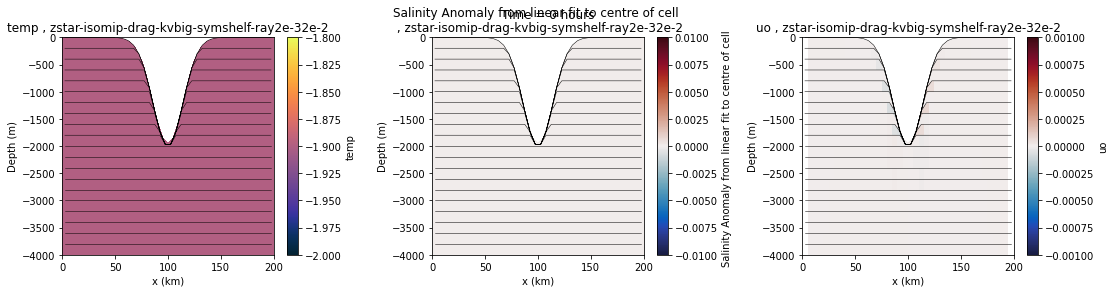

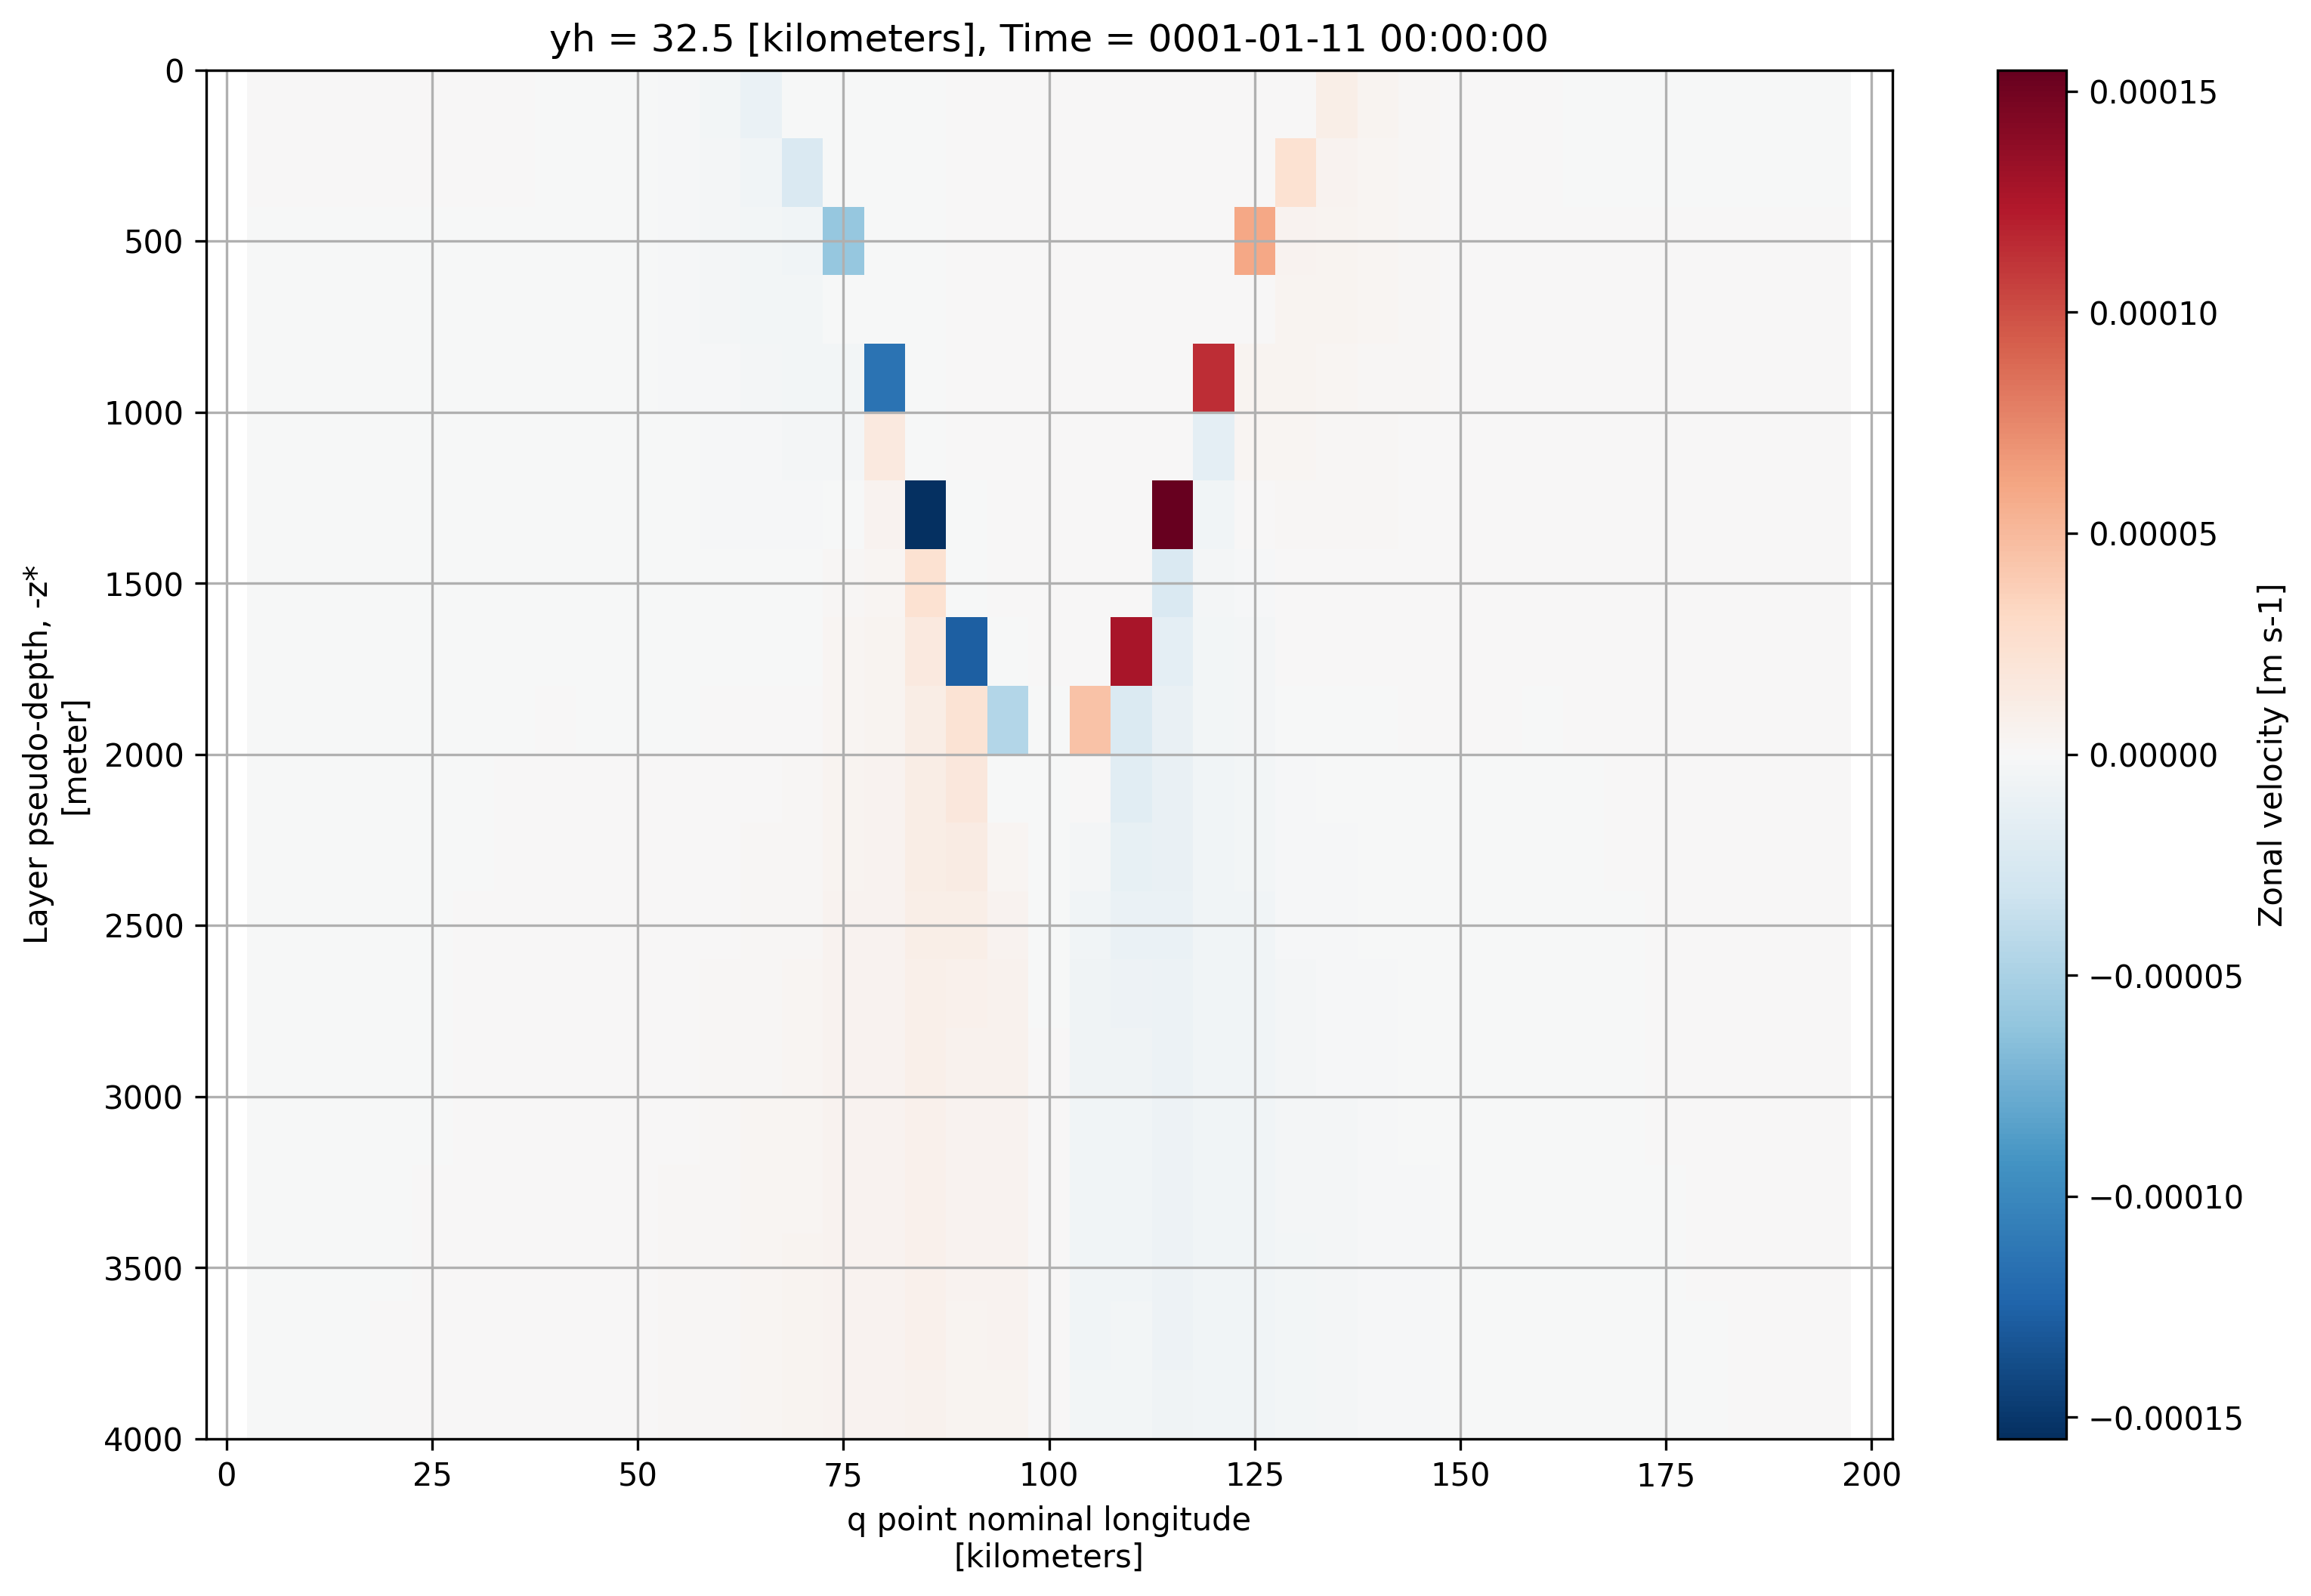

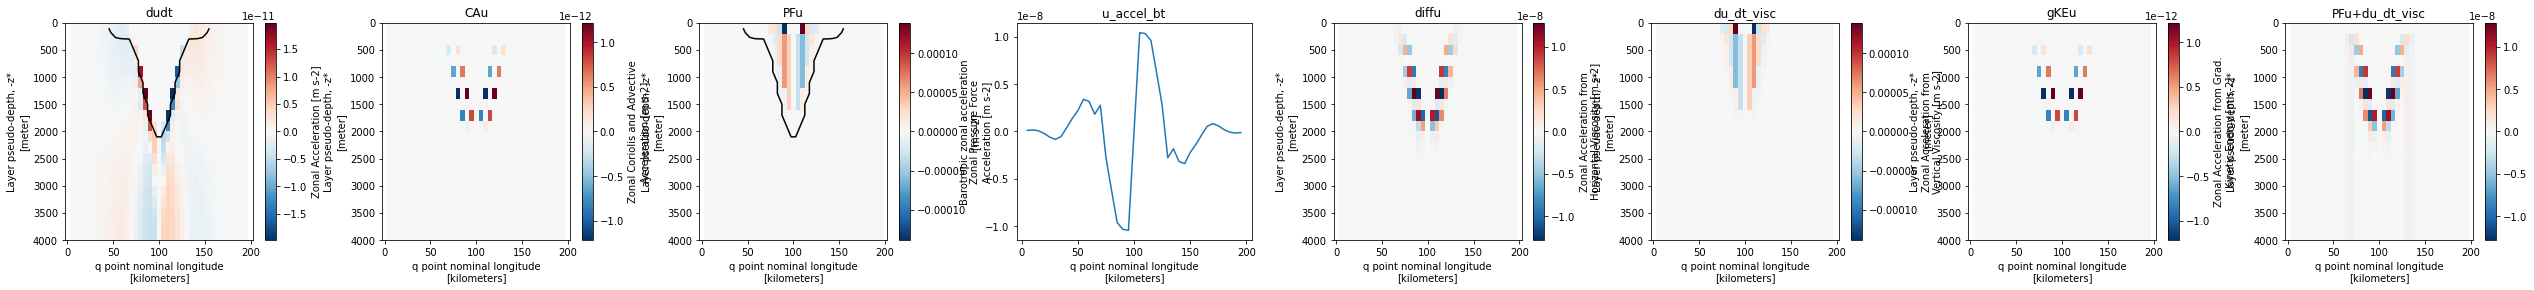

/Users/claireyung/opt/anaconda3/lib/python3.9/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


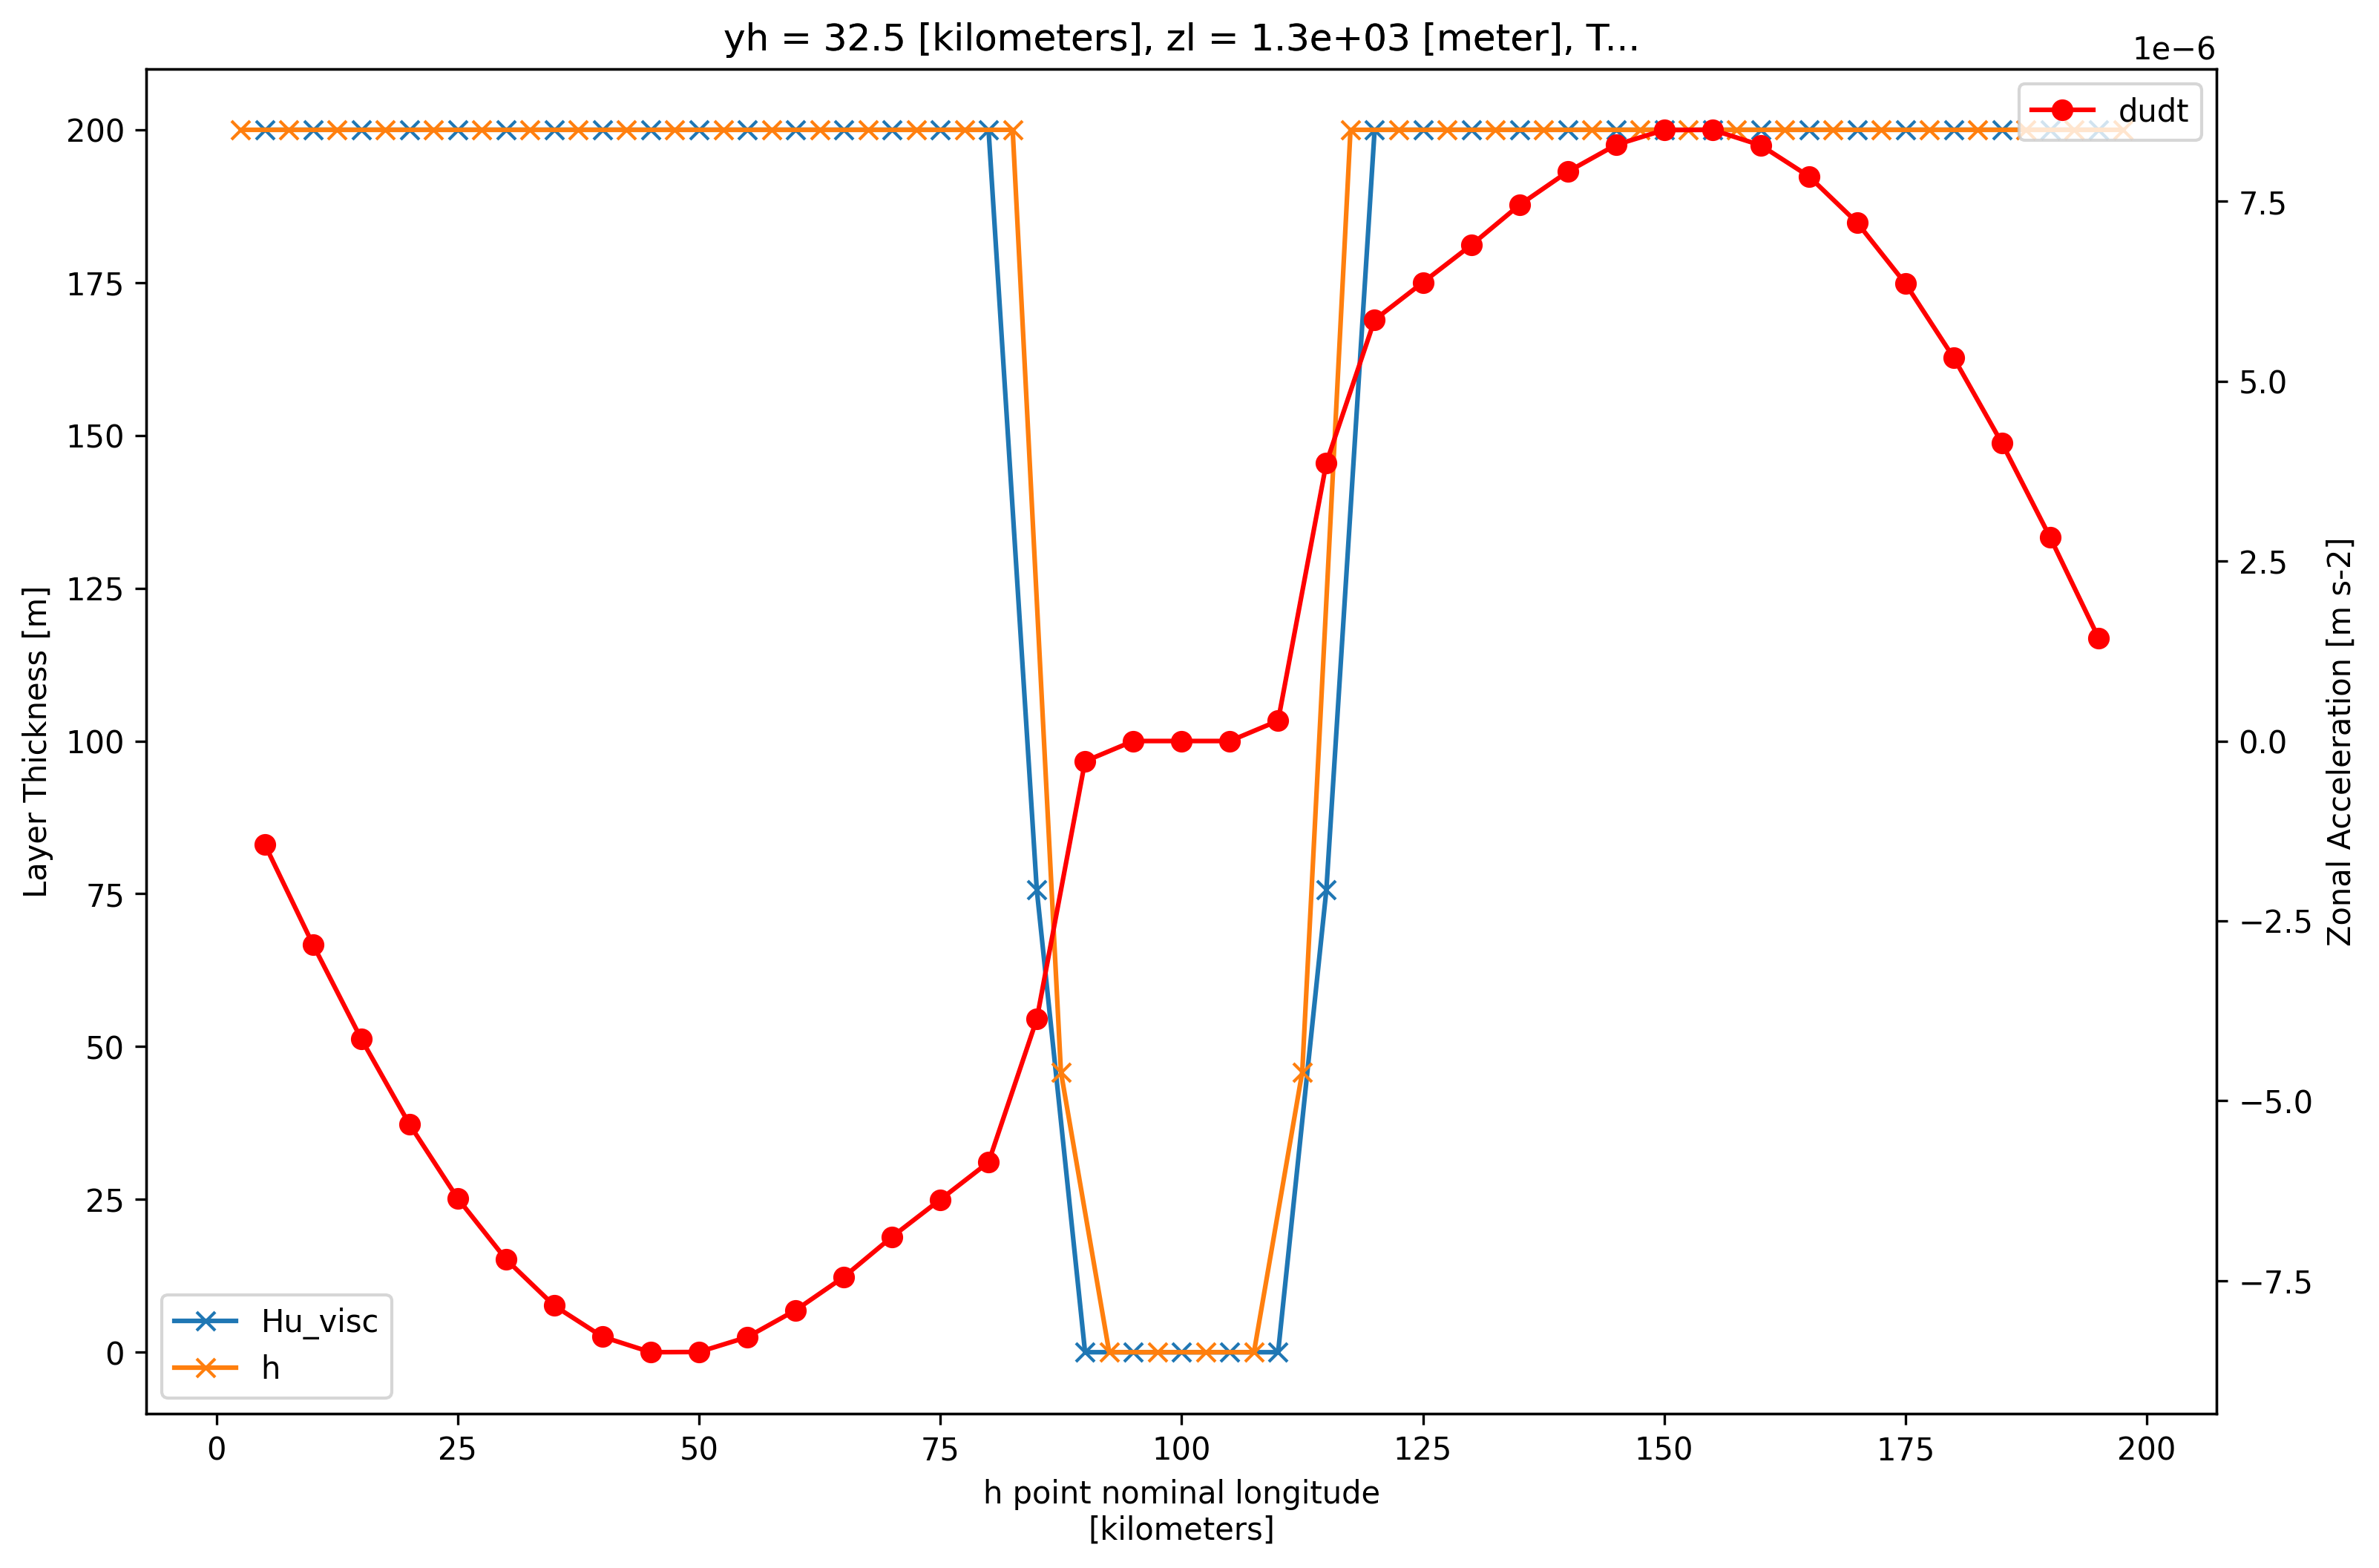

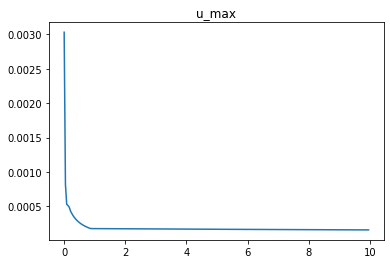

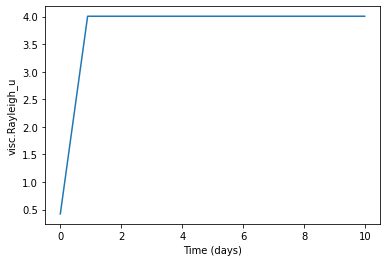

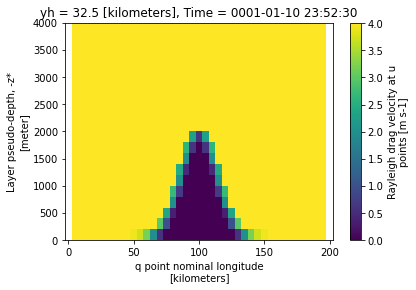

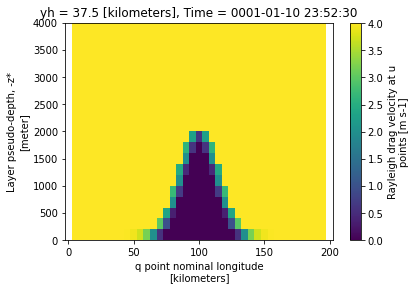

In [4]:


label = 'zstar-isomip-drag-kvbig-symshelf-ray2e-32e-2'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_files(label)
IC = open_IC(label)
x = 0
time = -1#24*5-1
ymax = 4000
plot(axes[0],x,time,0,prog.temp,"temp",-2,-1.8,cm.cm.thermal,ymax)

prog = open_files(label)
IC = open_IC(label)

#plot(axes[1],x,time,0,prog.salt,"salt",33.7,34.6,cm.cm.haline,ymax)
ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-4000) + 33.8
plot(axes[1],x,time,0,IC.Salt-ideal_salt,"Salinity Anomaly from linear fit to centre of cell \n",-1e-2,1e-2,cm.cm.balance,ymax)


prog = open_files(label)
IC = open_IC(label)

plot(axes[2],x,time,0,prog.u,"uo",-1e-3,1e-3,cm.cm.balance,ymax)

fig.subplots_adjust(wspace = 0.4)
fig.suptitle('Time = '+str(time+1)+' hours')
plt.show()

mom = open_mom(label)
prog = open_files(label)
time = -1
y = 0

fig, ax = plt.subplots(figsize = (12,8), dpi = 300)
prog.u.isel(Time = time, yh = y).plot(yincrease = False)
plt.grid()
plt.show()

fig, axes = plt.subplots(ncols = 8, figsize= (44,4))
prog.h.isel(Time = time, yh = y).plot.contour(ax = axes[0], yincrease = False, levels = [199], colors = 'k')
prog.h.isel(Time = time, yh = y).plot.contour(ax = axes[2], yincrease = False, levels = [199], colors = 'k')
mom.dudt.isel(Time = time, yh = y).plot(ax = axes[0], yincrease = False)#, vmin = -1e-12, vmax = 1e-12, cmap = 'RdBu_r')
axes[0].set_title('dudt')

mom.CAu.isel(Time = time, yh = y).plot(ax = axes[1], yincrease = False)#, cmap = 'RdBu_r', vmin = -1e-12, vmax = 1e-12)
axes[1].set_title('CAu')
mom.PFu.isel(Time = time, yh = y).plot(ax = axes[2], yincrease = False)#, cmap = 'RdBu_r', vmin = -1e-12, vmax = 1e-12)
axes[2].set_title('PFu')
mom.u_accel_bt.isel(Time = time, yh = y).plot(ax = axes[3])
axes[3].set_title('u_accel_bt')
mom.diffu.isel(Time = time, yh = y).plot(ax = axes[4], yincrease = False)#, cmap = 'RdBu_r', vmin = -1e-12, vmax = 1e-12)
axes[4].set_title('diffu')
mom.du_dt_visc.isel(Time = time, yh = y).plot(ax = axes[5], yincrease = False)#, cmap = 'RdBu_r', vmin = -1e-12, vmax = 1e-12)
axes[5].set_title('du_dt_visc')
mom.gKEu.isel(Time = time, yh = y).plot(ax = axes[6], yincrease = False)#, cmap = 'RdBu_r', vmin = -1e-12, vmax = 1e-12)
axes[6].set_title('gKEu')
(mom.du_dt_visc+mom.PFu-(mom.du_dt_visc+mom.PFu).isel(zl=0)).isel(Time = time, yh = y).plot(ax = axes[7], yincrease = False)#, cmap = 'RdBu_r', vmin = -1e-12, vmax = 1e-12)
axes[7].set_title('PFu+du_dt_visc')


fig.subplots_adjust(wspace = 0.35)
plt.show()

zl = 1200

fig, ax = plt.subplots(figsize = (12,8), dpi = 300)
visc = open_visc(label)
visc.Hu_visc.isel(Time = 0, yh = 0).sel(zl = zl, method = 'nearest').plot(marker = 'x', label = 'Hu_visc')
prog.h.isel(Time = 0, yh = 0).sel(zl = zl, method = 'nearest').plot(marker = 'x', label = 'h')
ax2 = ax.twinx()
mom.dudt.isel(Time = 0, yh = y).sel(zl = zl, method = 'nearest').plot(ax = ax2, color = 'r', marker = 'o', label = 'dudt')#ax = axes[0])#, yincrease = False)#, vmin = -1e-12, vmax = 1e-12, cmap = 'RdBu_r')
#yincrease = False)
ax.legend()
ax2.legend()

plt.show()

# fig, ax = plt.subplots(figsize = (12,8), dpi = 300)
# visc = xr.open_dataset('archive/visc-'+label+'.nc')
# visc.Hu_visc.isel(Time = 0, yh = 0).sel(zl = 2000, method = 'nearest').plot(marker = 'x', label = 'Hu_visc')
# ax2 = ax.twinx()
# mom.dudt.isel(Time = 0, yh = y).sel(zl = 2000, method = 'nearest').plot(ax = ax2, color = 'r', marker = 'o', label = 'dudt')#ax = axes[0])#, yincrease = False)#, vmin = -1e-12, vmax = 1e-12, cmap = 'RdBu_r')
# #yincrease = False)
# ax.legend()
# ax2.legend()
plt.plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
          label = label) 
plt.title('u_max')
plt.show()

plt.plot(np.arange(len(visc.Time))/(24*4), visc.Rayleigh_u.isel(zl = 0, yh = 0, xq = 1).values)
plt.ylabel('visc.Rayleigh_u')
plt.xlabel('Time (days)')
plt.show()
visc.Rayleigh_u.isel(yh = 0,Time = -1).plot()
plt.show()
visc.Rayleigh_u.isel(yh = 1,Time = -1).plot()
plt.show()


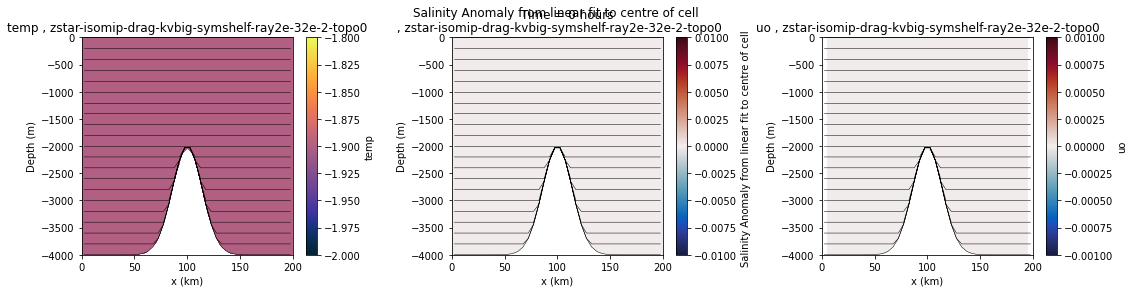

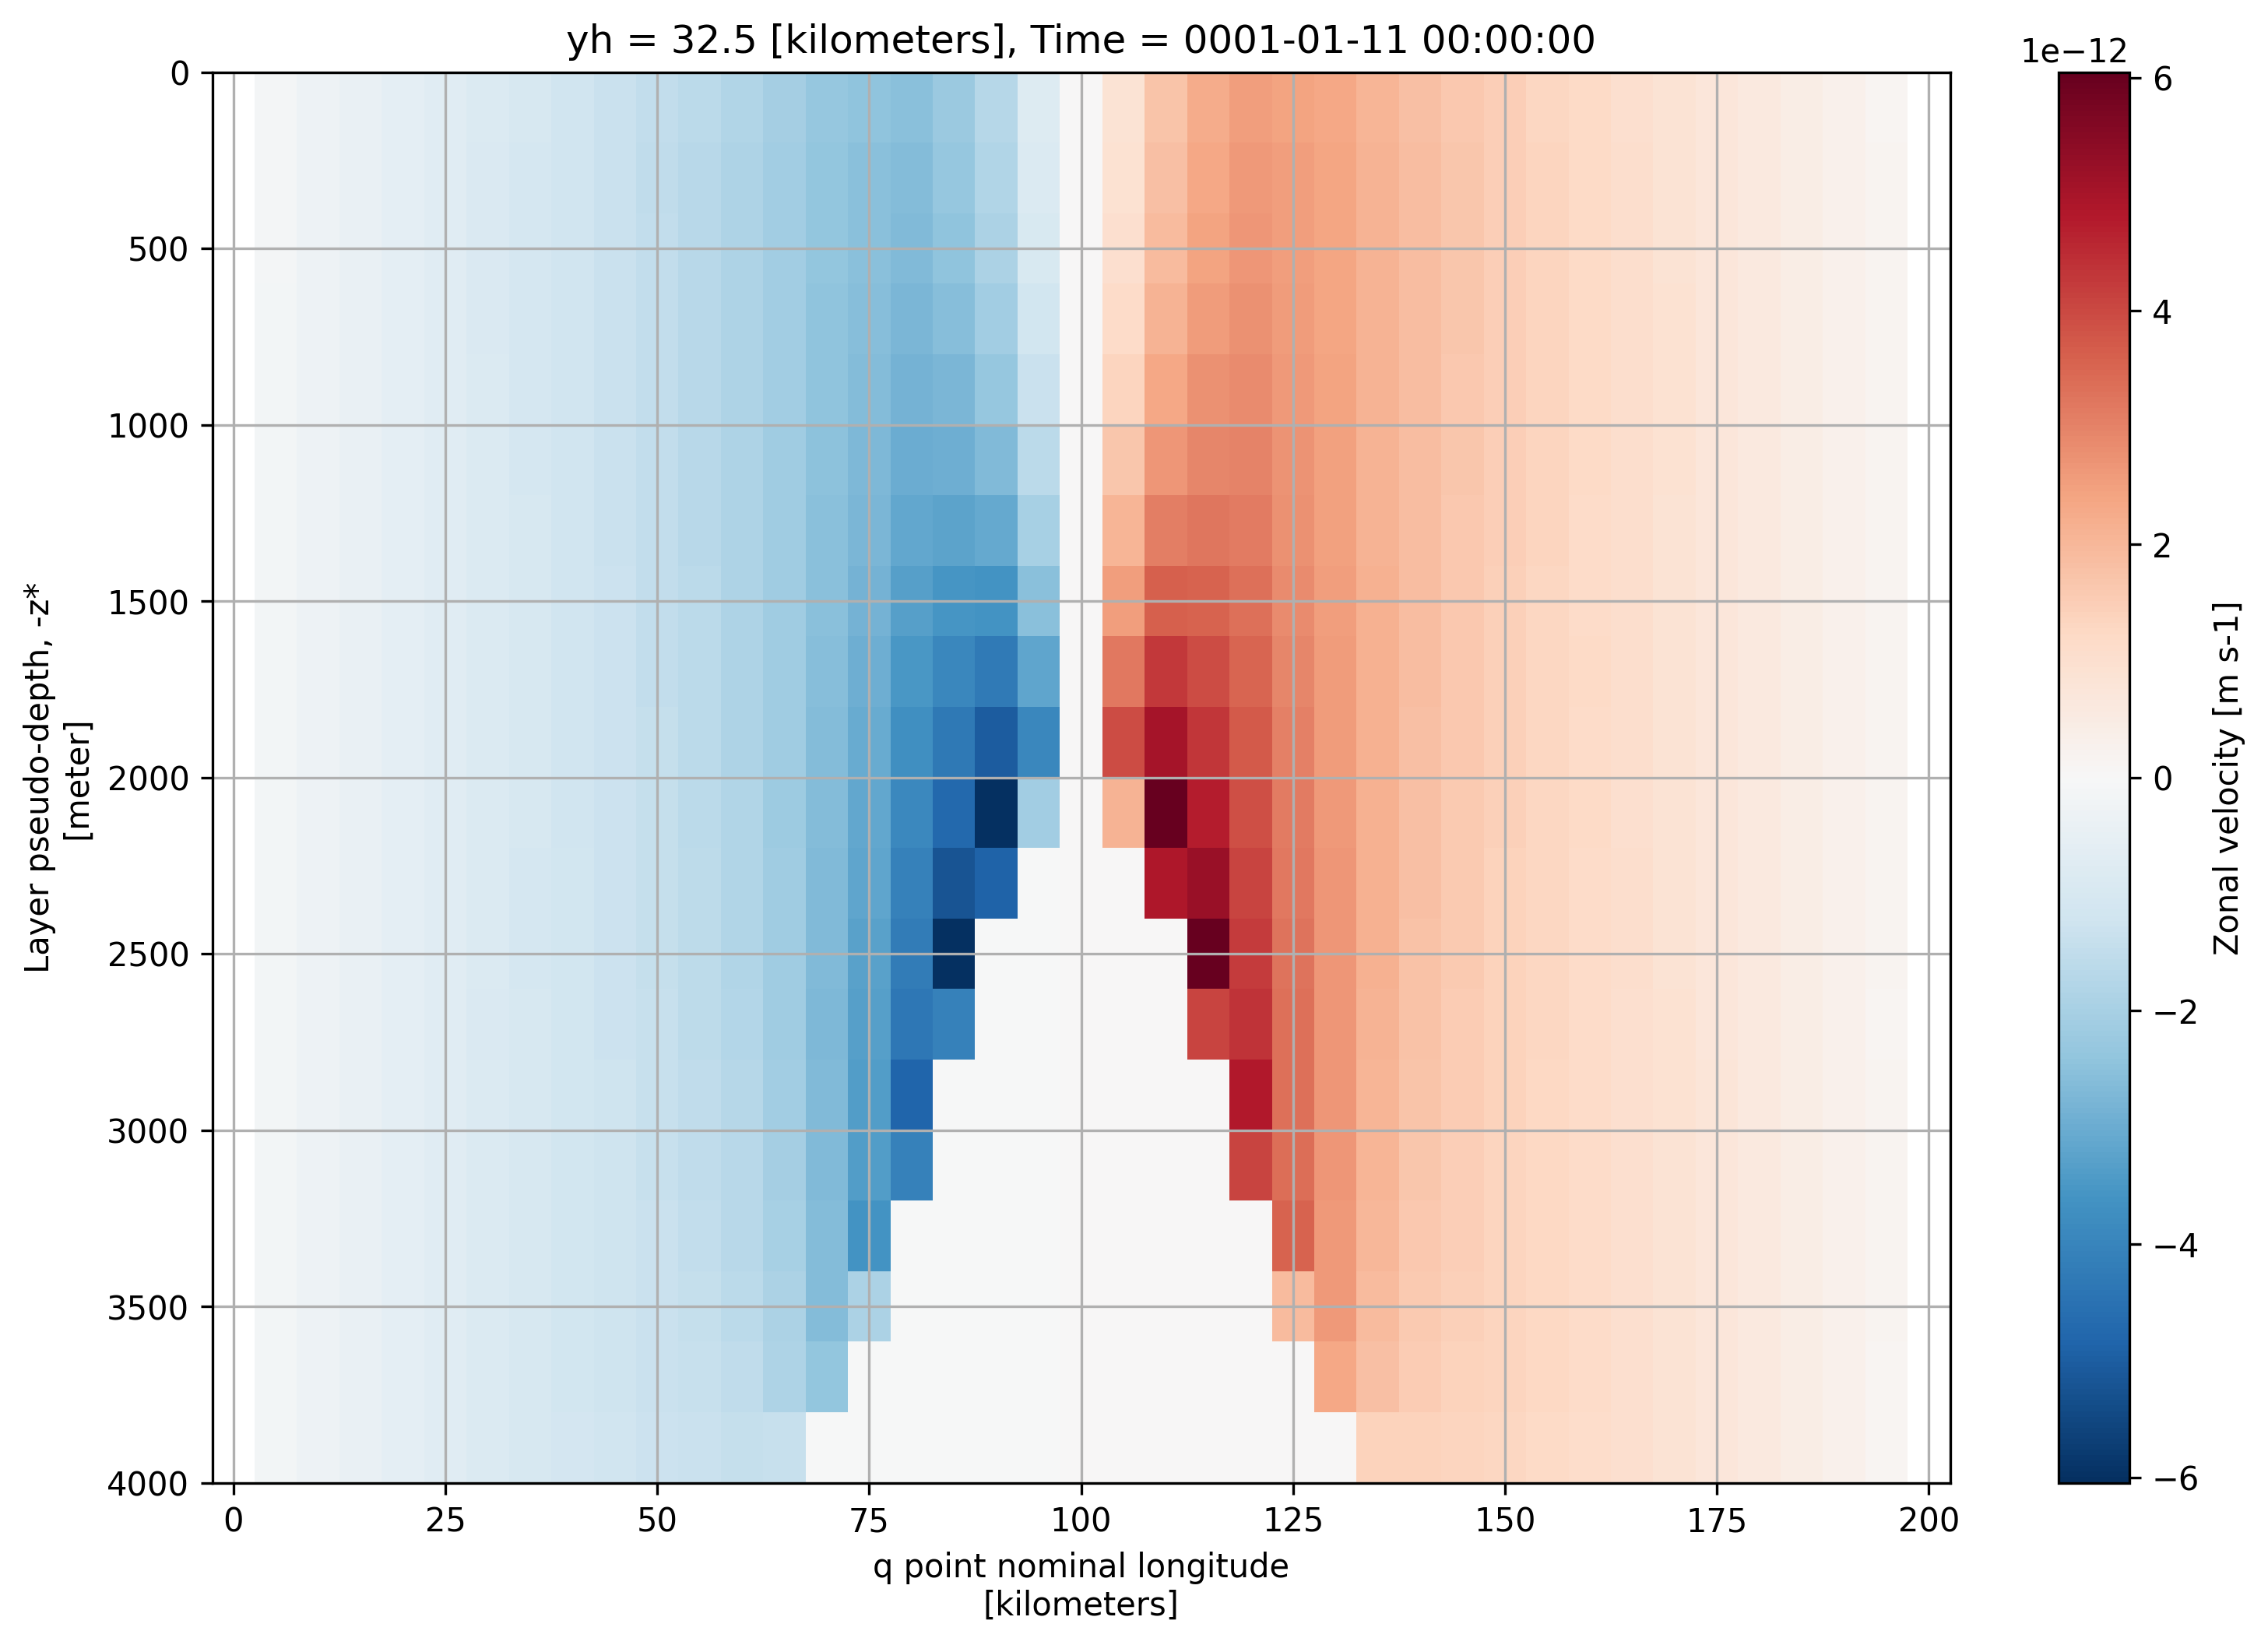

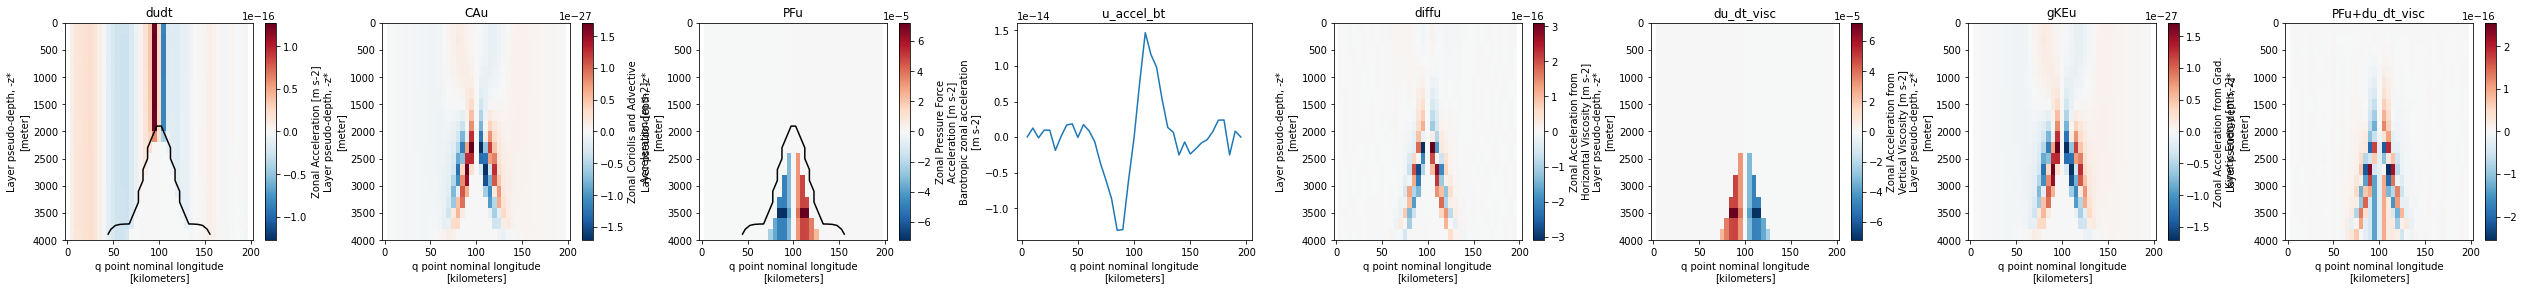

/Users/claireyung/opt/anaconda3/lib/python3.9/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


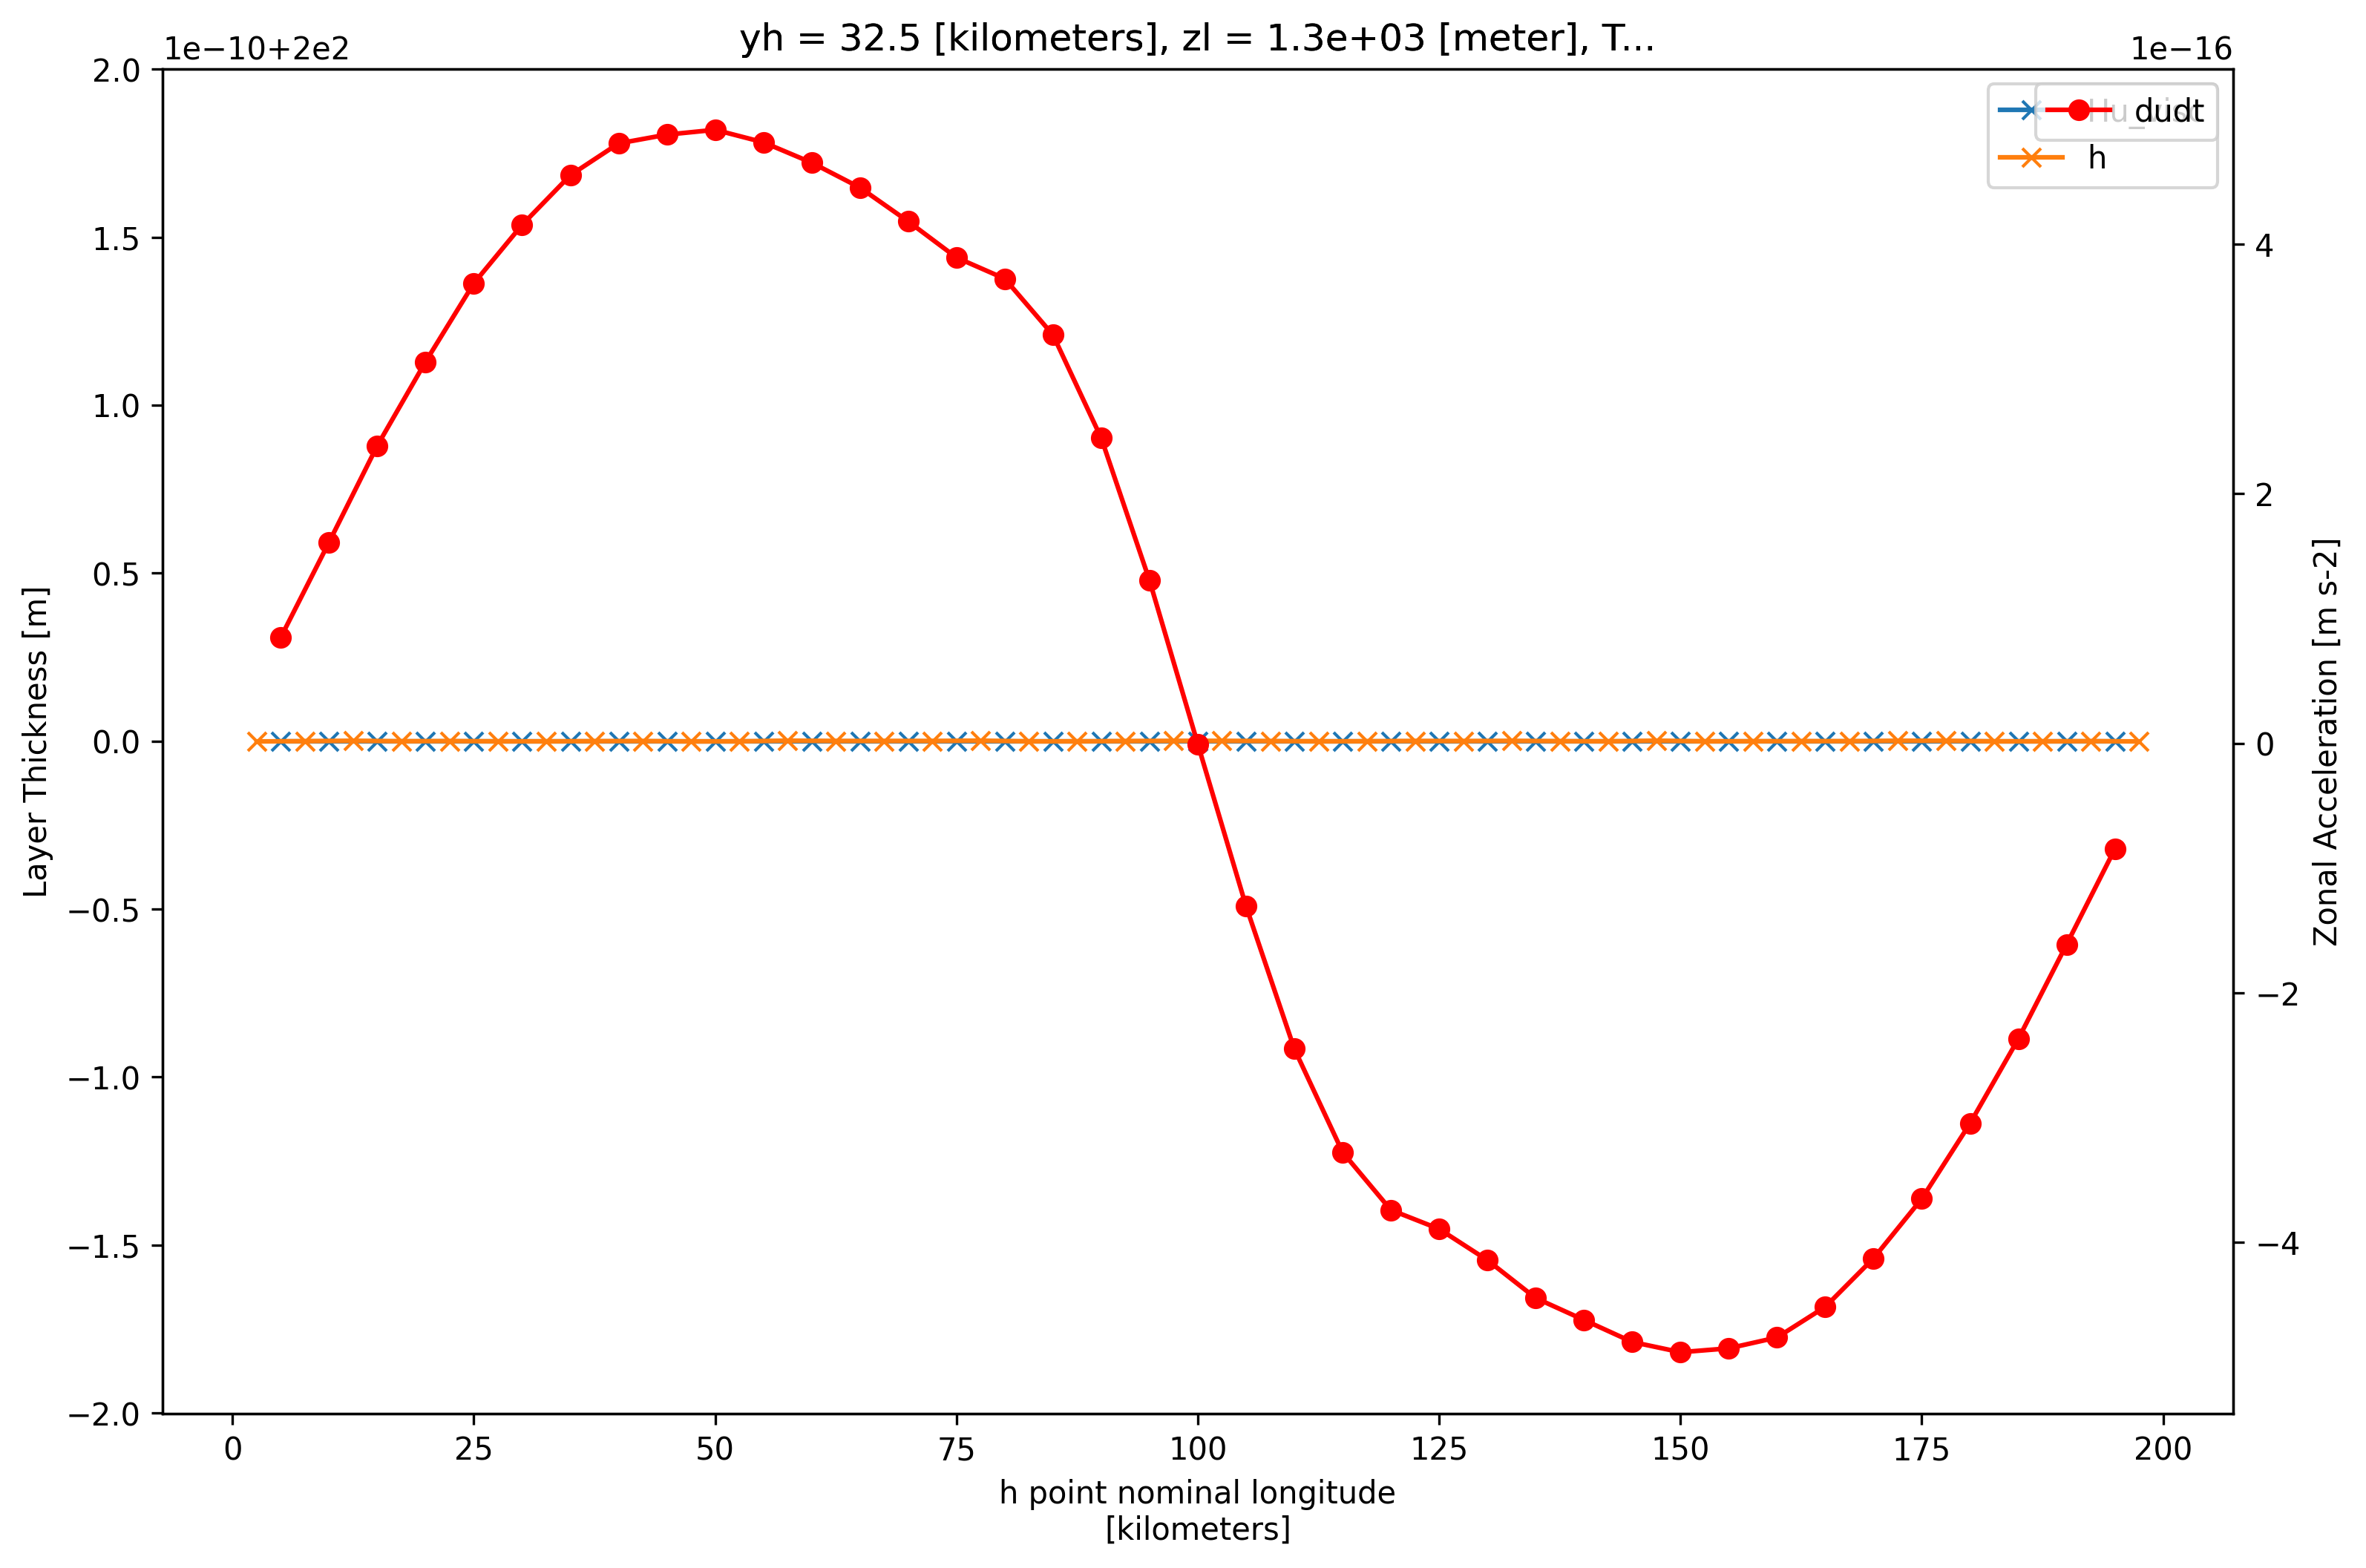

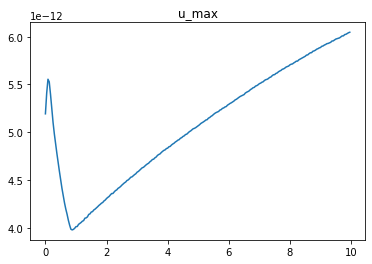

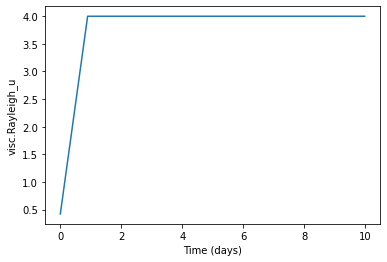

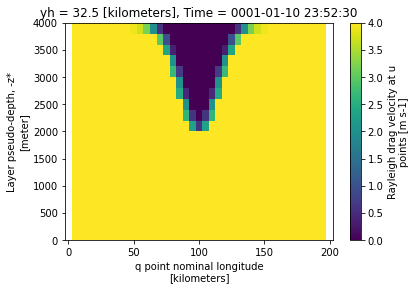

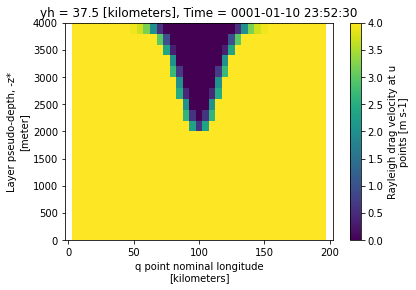

In [5]:


label = 'zstar-isomip-drag-kvbig-symshelf-ray2e-32e-2-topo0'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_files(label)
IC = open_IC(label)
x = 0
time = -1#24*5-1
ymax = 4000
plot(axes[0],x,time,0,prog.temp,"temp",-2,-1.8,cm.cm.thermal,ymax)

prog = open_files(label)
IC = open_IC(label)

#plot(axes[1],x,time,0,prog.salt,"salt",33.7,34.6,cm.cm.haline,ymax)
ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-4000) + 33.8
plot(axes[1],x,time,0,IC.Salt-ideal_salt,"Salinity Anomaly from linear fit to centre of cell \n",-1e-2,1e-2,cm.cm.balance,ymax)


prog = open_files(label)
IC = open_IC(label)

plot(axes[2],x,time,0,prog.u,"uo",-1e-3,1e-3,cm.cm.balance,ymax)

fig.subplots_adjust(wspace = 0.4)
fig.suptitle('Time = '+str(time+1)+' hours')
plt.show()

mom = open_mom(label)
prog = open_files(label)
time = -1
y = 0

fig, ax = plt.subplots(figsize = (12,8), dpi = 300)
prog.u.isel(Time = time, yh = y).plot(yincrease = False)
plt.grid()
plt.show()

fig, axes = plt.subplots(ncols = 8, figsize= (44,4))
prog.h.isel(Time = time, yh = y).plot.contour(ax = axes[0], yincrease = False, levels = [199], colors = 'k')
prog.h.isel(Time = time, yh = y).plot.contour(ax = axes[2], yincrease = False, levels = [199], colors = 'k')
mom.dudt.isel(Time = time, yh = y).plot(ax = axes[0], yincrease = False)#, vmin = -1e-12, vmax = 1e-12, cmap = 'RdBu_r')
axes[0].set_title('dudt')

mom.CAu.isel(Time = time, yh = y).plot(ax = axes[1], yincrease = False)#, cmap = 'RdBu_r', vmin = -1e-12, vmax = 1e-12)
axes[1].set_title('CAu')
mom.PFu.isel(Time = time, yh = y).plot(ax = axes[2], yincrease = False)#, cmap = 'RdBu_r', vmin = -1e-12, vmax = 1e-12)
axes[2].set_title('PFu')
mom.u_accel_bt.isel(Time = time, yh = y).plot(ax = axes[3])
axes[3].set_title('u_accel_bt')
mom.diffu.isel(Time = time, yh = y).plot(ax = axes[4], yincrease = False)#, cmap = 'RdBu_r', vmin = -1e-12, vmax = 1e-12)
axes[4].set_title('diffu')
mom.du_dt_visc.isel(Time = time, yh = y).plot(ax = axes[5], yincrease = False)#, cmap = 'RdBu_r', vmin = -1e-12, vmax = 1e-12)
axes[5].set_title('du_dt_visc')
mom.gKEu.isel(Time = time, yh = y).plot(ax = axes[6], yincrease = False)#, cmap = 'RdBu_r', vmin = -1e-12, vmax = 1e-12)
axes[6].set_title('gKEu')
(mom.du_dt_visc+mom.PFu-(mom.du_dt_visc+mom.PFu).isel(zl=0)).isel(Time = time, yh = y).plot(ax = axes[7], yincrease = False)#, cmap = 'RdBu_r', vmin = -1e-12, vmax = 1e-12)
axes[7].set_title('PFu+du_dt_visc')


fig.subplots_adjust(wspace = 0.35)
plt.show()

zl = 1200

fig, ax = plt.subplots(figsize = (12,8), dpi = 300)
visc = open_visc(label)
visc.Hu_visc.isel(Time = 0, yh = 0).sel(zl = zl, method = 'nearest').plot(marker = 'x', label = 'Hu_visc')
prog.h.isel(Time = 0, yh = 0).sel(zl = zl, method = 'nearest').plot(marker = 'x', label = 'h')
ax2 = ax.twinx()
mom.dudt.isel(Time = 0, yh = y).sel(zl = zl, method = 'nearest').plot(ax = ax2, color = 'r', marker = 'o', label = 'dudt')#ax = axes[0])#, yincrease = False)#, vmin = -1e-12, vmax = 1e-12, cmap = 'RdBu_r')
#yincrease = False)
ax.legend()
ax2.legend()

plt.show()

# fig, ax = plt.subplots(figsize = (12,8), dpi = 300)
# visc = xr.open_dataset('archive/visc-'+label+'.nc')
# visc.Hu_visc.isel(Time = 0, yh = 0).sel(zl = 2000, method = 'nearest').plot(marker = 'x', label = 'Hu_visc')
# ax2 = ax.twinx()
# mom.dudt.isel(Time = 0, yh = y).sel(zl = 2000, method = 'nearest').plot(ax = ax2, color = 'r', marker = 'o', label = 'dudt')#ax = axes[0])#, yincrease = False)#, vmin = -1e-12, vmax = 1e-12, cmap = 'RdBu_r')
# #yincrease = False)
# ax.legend()
# ax2.legend()
plt.plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
          label = label) 
plt.title('u_max')
plt.show()

plt.plot(np.arange(len(visc.Time))/(24*4), visc.Rayleigh_u.isel(zl = 0, yh = 0, xq = 1).values)
plt.ylabel('visc.Rayleigh_u')
plt.xlabel('Time (days)')
plt.show()
visc.Rayleigh_u.isel(yh = 0,Time = -1).plot()
plt.show()
visc.Rayleigh_u.isel(yh = 1,Time = -1).plot()
plt.show()


We have applied a Rayleigh drag rate everywhere that grows from 2e-3 to 2e-2 over 1 day.

This rate is multiplied by a thickness, where we choose the average between adjacent h in the x direction, therefore there is NO upwinding in this thickness.

Let's analyse the output in one of the layers where there is an obvious velocity that isn't decaying, unlike the rest of the domain, z = 1300

/Users/claireyung/opt/anaconda3/lib/python3.9/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


Text(0.5, 0.98, 'Time = 1 hours')

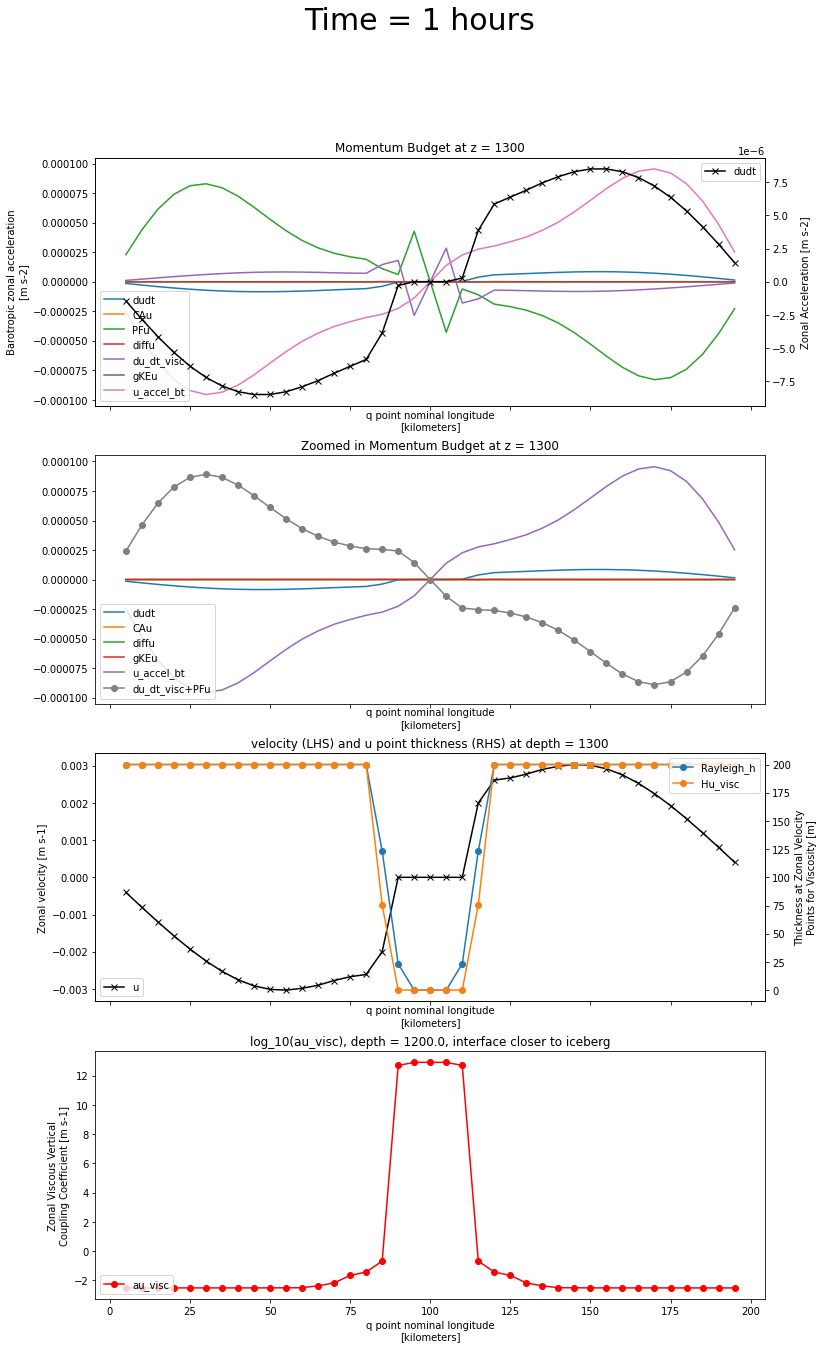

In [55]:
label = 'zstar-isomip-drag-kvbig-symshelf-ray2e-32e-2'

mom = open_mom(label)
prog = open_files(label)
visc = open_visc(label)
time = 0
depth = 1300
fig, axes = plt.subplots(nrows = 4, sharex = True, figsize = (12,21))
for term in ['dudt','CAu','PFu','diffu','du_dt_visc','gKEu']:
    mom[term].isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = axes[0],label = term)
term = 'u_accel_bt'
mom[term].isel(Time = time, yh = y).plot(ax = axes[0], label = term)
axes[0].legend(loc = 'lower left')
ax2 = axes[0].twinx()
#(mom['du_dt_visc']+mom['PFu']).isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = ax2, label = 'PFu+du_dt_visc', color = 'k')
(mom['dudt']).isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = ax2, label = 'dudt', color = 'k', marker = 'x')
ax2.legend(loc = 'upper right')
axes[0].set_title('Momentum Budget at z = '+str(depth))
ax2.set_title('')

for term in ['dudt','CAu','diffu','gKEu']:
    mom[term].isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = axes[1],label = term)
term = 'u_accel_bt'
mom[term].isel(Time = time, yh = y).plot(ax = axes[1], label = term)
#ax2 = axes[1].twinx()
#(mom['du_dt_visc']+mom['PFu']).isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = ax2, label = 'PFu+du_dt_visc', color = 'k')
(mom['du_dt_visc']+mom['PFu']).isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = axes[1], label = 'du_dt_visc+PFu', color = 'grey', marker = 'o')
#ax2.legend(loc = 'upper right')
axes[1].legend(loc = 'lower left')
axes[1].set_title('Zoomed in Momentum Budget at z = '+str(depth))
#ax2.set_title('')


for term in ['u']:
    prog[term].isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = axes[2], label = term, color = 'k', marker = 'x')
axes[2].legend(loc = 'lower left')
ax2 = axes[2].twinx()
for term in ['Rayleigh_h','Hu_visc']:
    visc[term].isel(Time = time*4, yh = y).sel(zl = depth, method = 'nearest').plot(ax = ax2, label = term, marker = 'o')

ax2.legend(loc = 'upper right')
axes[2].set_title('velocity (LHS) and u point thickness (RHS) at depth = '+str(depth))
ax2.set_title('')

np.log10(visc.au_visc.isel(Time = time*4, yh = y).sel(zi = depth-50, method = 'nearest')).plot(ax = axes[3], label = 'au_visc', color = 'r', marker = 'o')
zs = visc.au_visc.isel(Time = time*4, yh = y).sel(zi = depth-50, method = 'nearest').zi.values
axes[3].legend(loc = 'lower left')
axes[3].set_title('log_10(au_visc), depth = '+str(zs)+', interface closer to iceberg')

fig.suptitle('Time = '+str(time+1)+' hours', fontsize = 30)

/Users/claireyung/opt/anaconda3/lib/python3.9/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


Text(0.5, 0.98, 'Time = 5 hours')

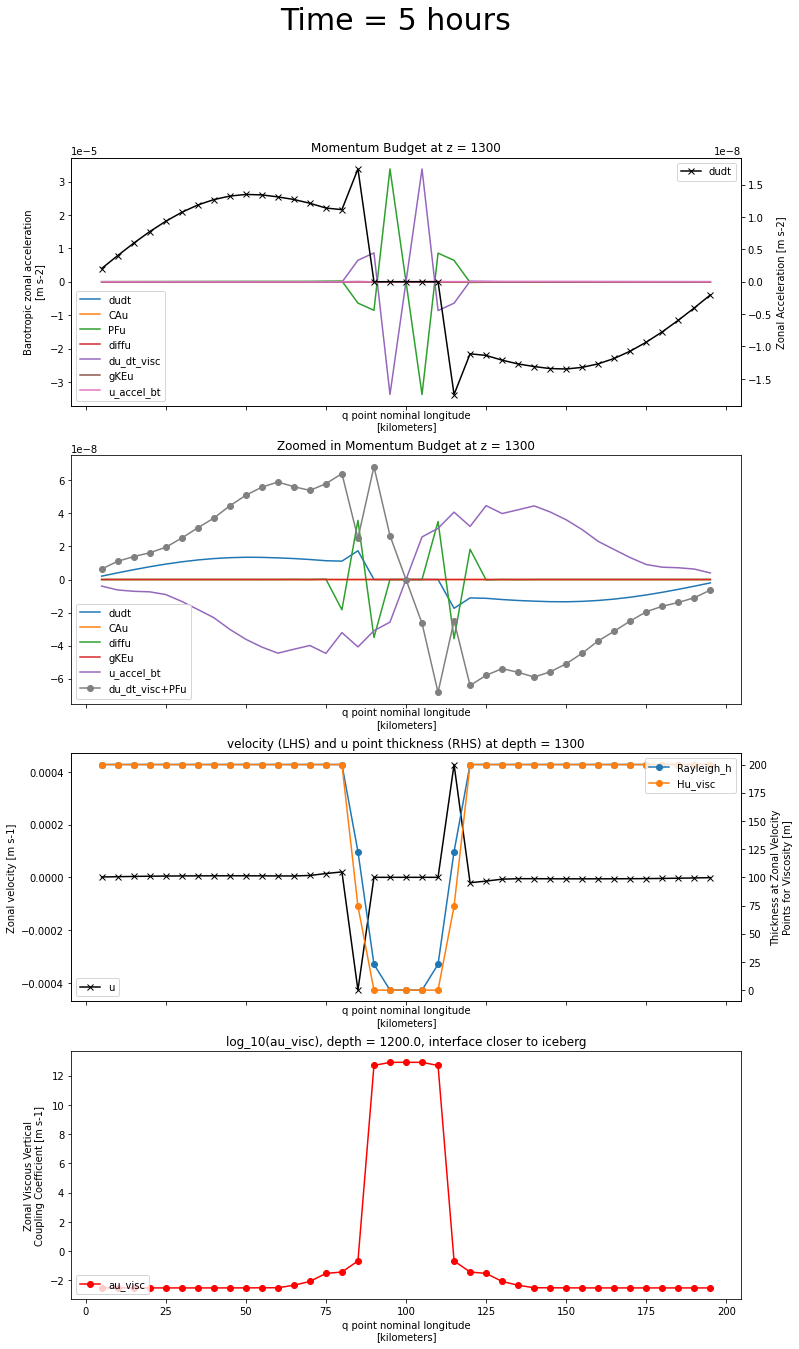

In [51]:
label = 'zstar-isomip-drag-kvbig-symshelf-ray2e-32e-2'

mom = open_mom(label)
prog = open_files(label)
visc = open_visc(label)
time = 5
depth = 1300
fig, axes = plt.subplots(nrows = 4, sharex = True, figsize = (12,21))
for term in ['dudt','CAu','PFu','diffu','du_dt_visc','gKEu']:
    mom[term].isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = axes[0],label = term)
term = 'u_accel_bt'
mom[term].isel(Time = time, yh = y).plot(ax = axes[0], label = term)
axes[0].legend(loc = 'lower left')
ax2 = axes[0].twinx()
#(mom['du_dt_visc']+mom['PFu']).isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = ax2, label = 'PFu+du_dt_visc', color = 'k')
(mom['dudt']).isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = ax2, label = 'dudt', color = 'k', marker = 'x')
ax2.legend(loc = 'upper right')
axes[0].set_title('Momentum Budget at z = '+str(depth))
ax2.set_title('')

for term in ['dudt','CAu','diffu','gKEu']:
    mom[term].isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = axes[1],label = term)
term = 'u_accel_bt'
mom[term].isel(Time = time, yh = y).plot(ax = axes[1], label = term)
#ax2 = axes[1].twinx()
#(mom['du_dt_visc']+mom['PFu']).isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = ax2, label = 'PFu+du_dt_visc', color = 'k')
(mom['du_dt_visc']+mom['PFu']).isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = axes[1], label = 'du_dt_visc+PFu', color = 'grey', marker = 'o')
#ax2.legend(loc = 'upper right')
axes[1].legend(loc = 'lower left')
axes[1].set_title('Zoomed in Momentum Budget at z = '+str(depth))
#ax2.set_title('')


for term in ['u']:
    prog[term].isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = axes[2], label = term, color = 'k', marker = 'x')
axes[2].legend(loc = 'lower left')
ax2 = axes[2].twinx()
for term in ['Rayleigh_h','Hu_visc']:
    visc[term].isel(Time = time*4, yh = y).sel(zl = depth, method = 'nearest').plot(ax = ax2, label = term, marker = 'o')

ax2.legend(loc = 'upper right')
axes[2].set_title('velocity (LHS) and u point thickness (RHS) at depth = '+str(depth))
ax2.set_title('')

np.log10(visc.au_visc.isel(Time = time*4, yh = y).sel(zi = depth-50, method = 'nearest')).plot(ax = axes[3], label = 'au_visc', color = 'r', marker = 'o')
zs = visc.au_visc.isel(Time = time*4, yh = y).sel(zi = depth-50, method = 'nearest').zi.values
axes[3].legend(loc = 'lower left')
axes[3].set_title('log_10(au_visc), depth = '+str(zs)+', interface closer to iceberg')

fig.suptitle('Time = '+str(time)+' hours', fontsize = 30)

/Users/claireyung/opt/anaconda3/lib/python3.9/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


Text(0.5, 0.98, 'Time = 239 hours')

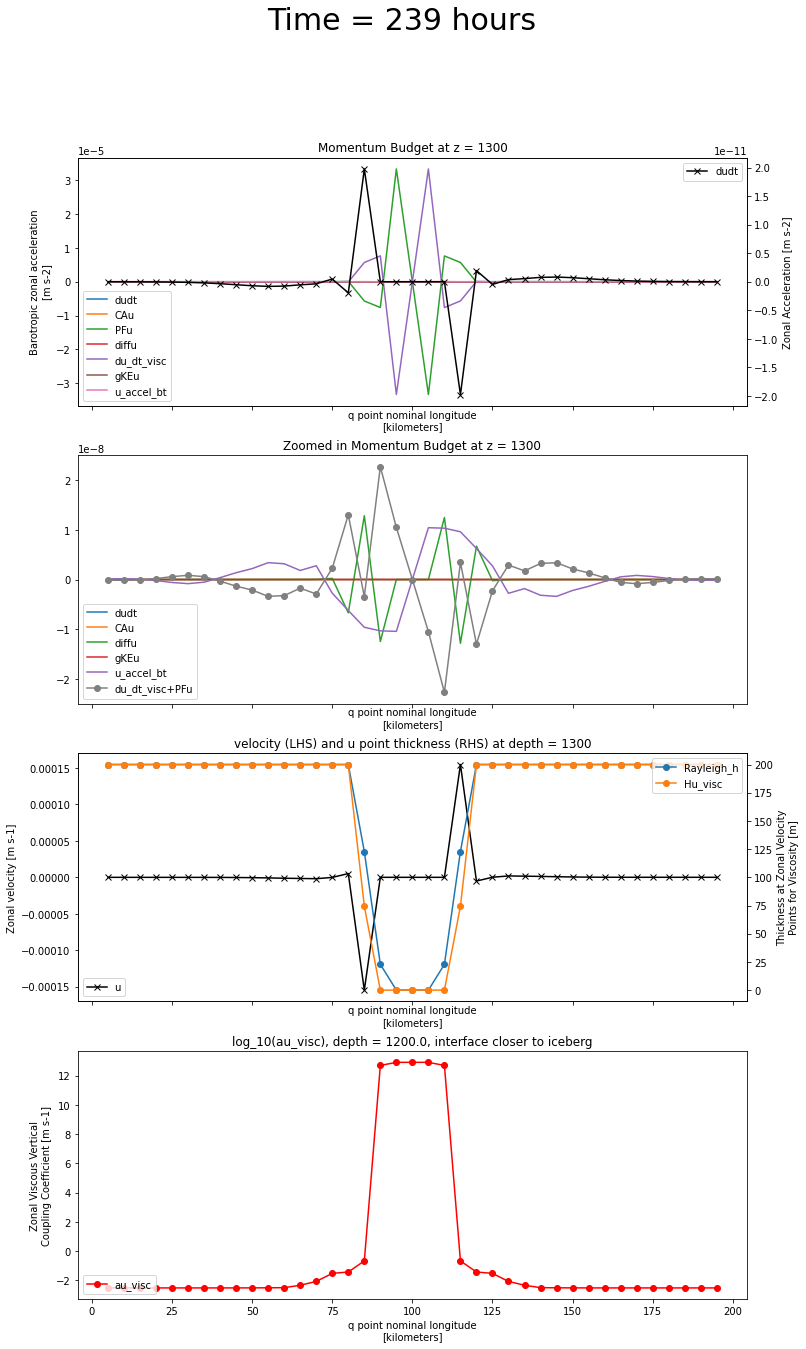

In [52]:
label = 'zstar-isomip-drag-kvbig-symshelf-ray2e-32e-2'

mom = open_mom(label)
prog = open_files(label)
visc = open_visc(label)
time = 10*24-1
depth = 1300
fig, axes = plt.subplots(nrows = 4, sharex = True, figsize = (12,21))
for term in ['dudt','CAu','PFu','diffu','du_dt_visc','gKEu']:
    mom[term].isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = axes[0],label = term)
term = 'u_accel_bt'
mom[term].isel(Time = time, yh = y).plot(ax = axes[0], label = term)
axes[0].legend(loc = 'lower left')
ax2 = axes[0].twinx()
#(mom['du_dt_visc']+mom['PFu']).isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = ax2, label = 'PFu+du_dt_visc', color = 'k')
(mom['dudt']).isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = ax2, label = 'dudt', color = 'k', marker = 'x')
ax2.legend(loc = 'upper right')
axes[0].set_title('Momentum Budget at z = '+str(depth))
ax2.set_title('')

for term in ['dudt','CAu','diffu','gKEu']:
    mom[term].isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = axes[1],label = term)
term = 'u_accel_bt'
mom[term].isel(Time = time, yh = y).plot(ax = axes[1], label = term)
#ax2 = axes[1].twinx()
#(mom['du_dt_visc']+mom['PFu']).isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = ax2, label = 'PFu+du_dt_visc', color = 'k')
(mom['du_dt_visc']+mom['PFu']).isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = axes[1], label = 'du_dt_visc+PFu', color = 'grey', marker = 'o')
#ax2.legend(loc = 'upper right')
axes[1].legend(loc = 'lower left')
axes[1].set_title('Zoomed in Momentum Budget at z = '+str(depth))
#ax2.set_title('')


for term in ['u']:
    prog[term].isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = axes[2], label = term, color = 'k', marker = 'x')
axes[2].legend(loc = 'lower left')
ax2 = axes[2].twinx()
for term in ['Rayleigh_h','Hu_visc']:
    visc[term].isel(Time = time*4, yh = y).sel(zl = depth, method = 'nearest').plot(ax = ax2, label = term, marker = 'o')

ax2.legend(loc = 'upper right')
axes[2].set_title('velocity (LHS) and u point thickness (RHS) at depth = '+str(depth))
ax2.set_title('')

np.log10(visc.au_visc.isel(Time = time*4, yh = y).sel(zi = depth-50, method = 'nearest')).plot(ax = axes[3], label = 'au_visc', color = 'r', marker = 'o')
zs = visc.au_visc.isel(Time = time*4, yh = y).sel(zi = depth-50, method = 'nearest').zi.values
axes[3].legend(loc = 'lower left')
axes[3].set_title('log_10(au_visc), depth = '+str(zs)+', interface closer to iceberg')

fig.suptitle('Time = '+str(time)+' hours', fontsize = 30)

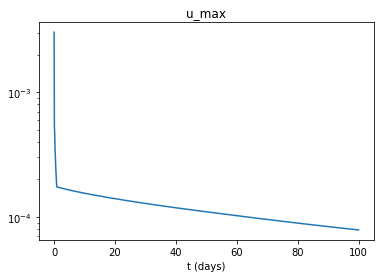

In [53]:
label = 'zstar-isomip-drag-kvbig-symshelf-ray2e-32e-2-longrun'
prog = open_files(label)
plt.plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
          label = label) 
plt.title('u_max')
plt.xlabel('t (days)')
plt.yscale('log')
plt.show()


/Users/claireyung/opt/anaconda3/lib/python3.9/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


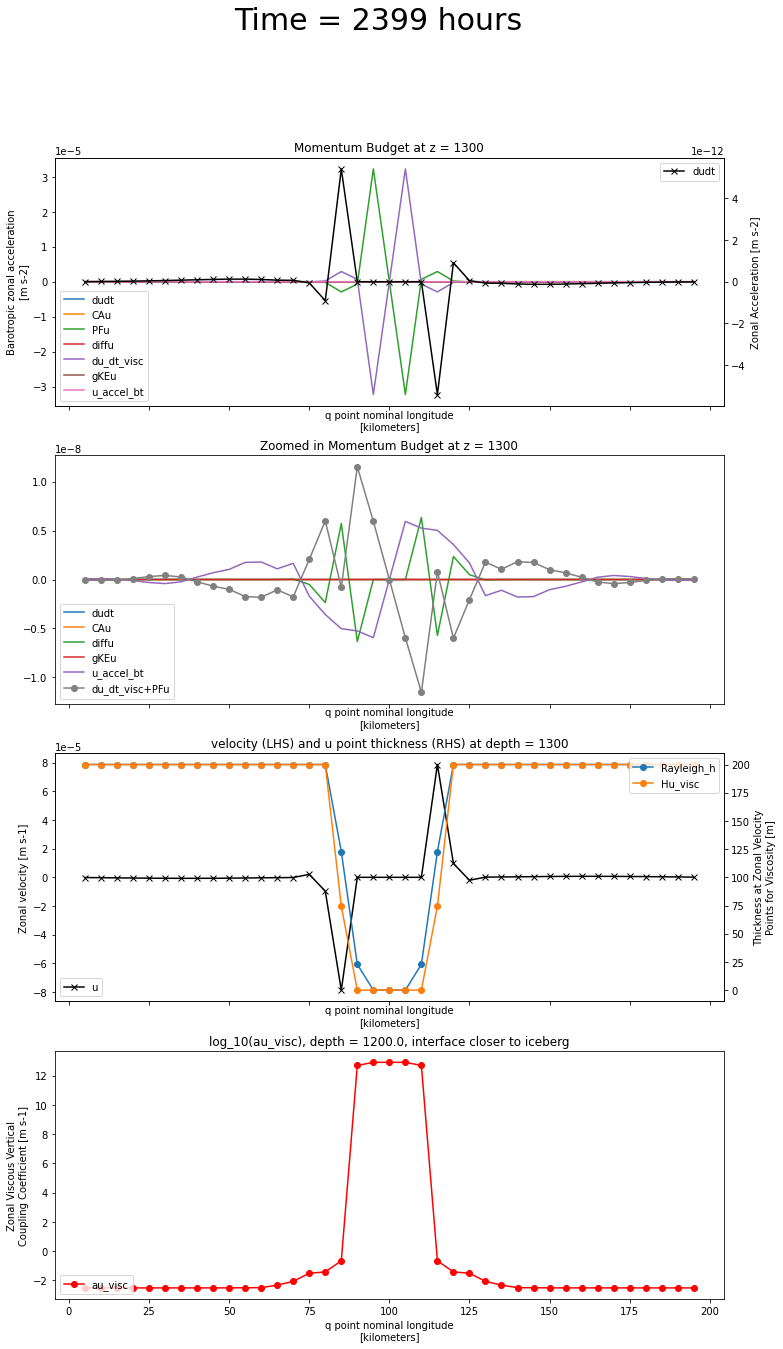

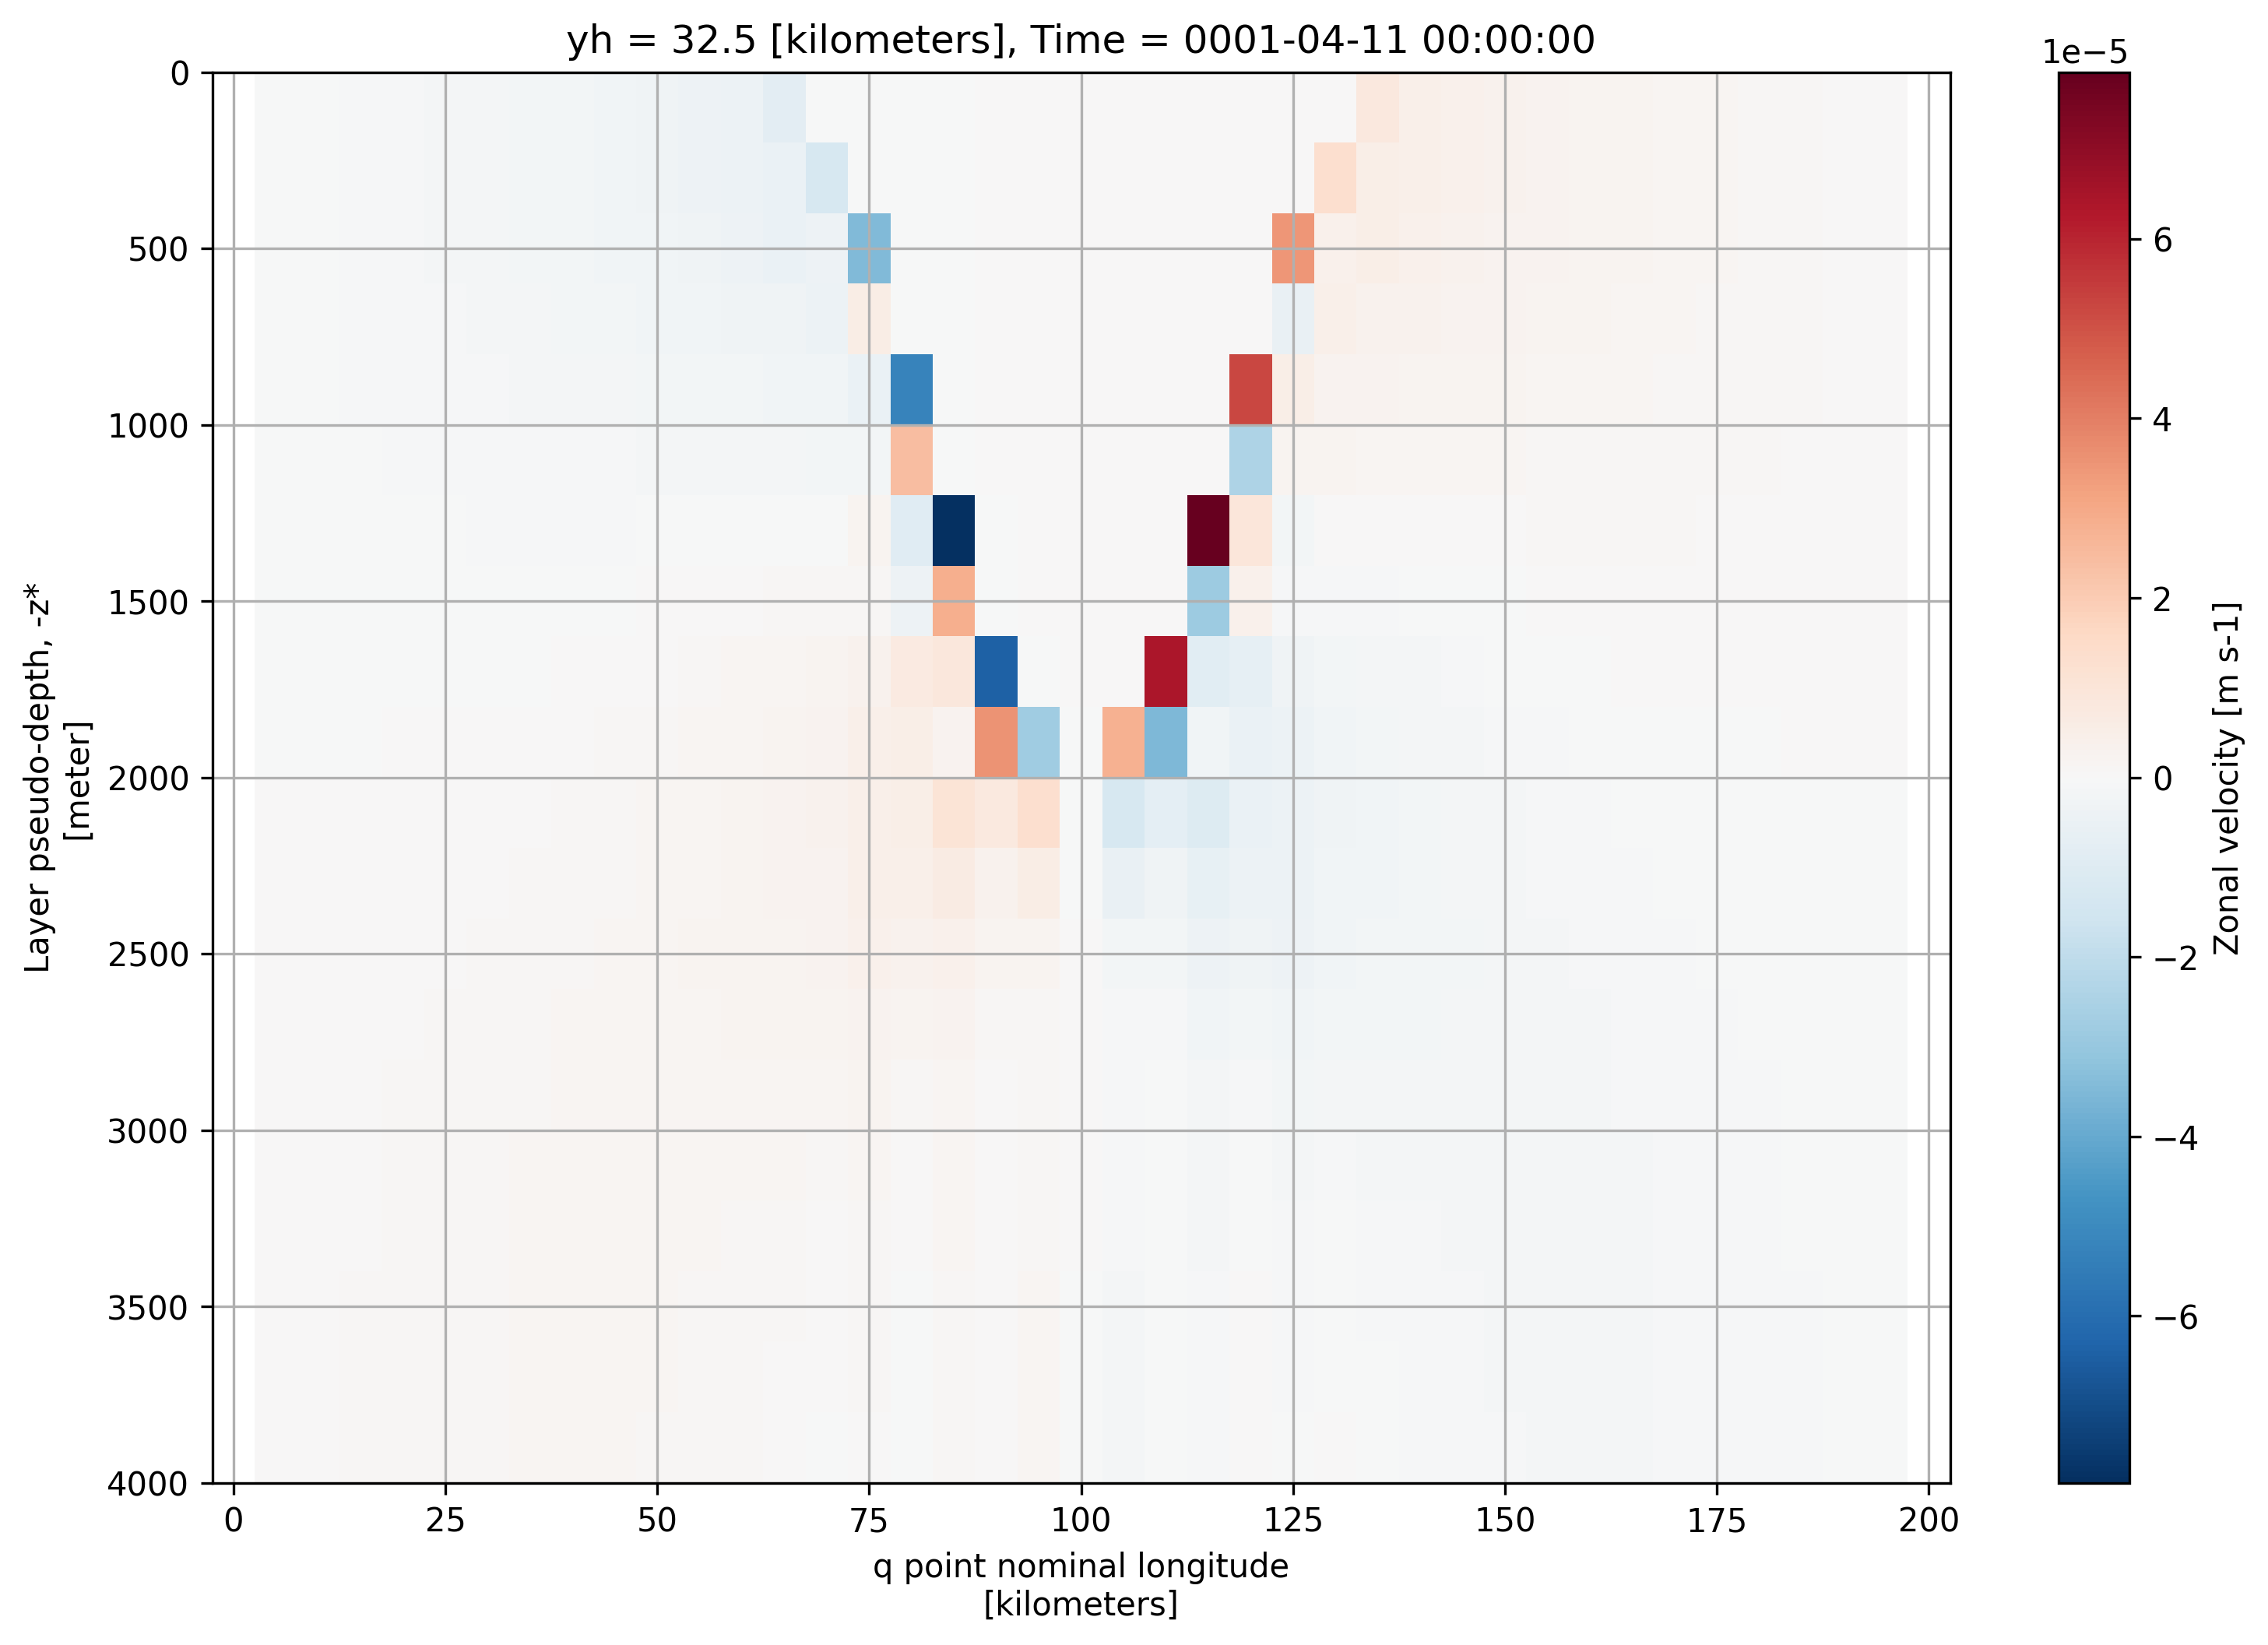

In [64]:
label = 'zstar-isomip-drag-kvbig-symshelf-ray2e-32e-2-longrun'

mom = open_mom(label)
prog = open_files(label)
visc = open_visc(label)
time = 100*24-1
depth = 1300
fig, axes = plt.subplots(nrows = 4, sharex = True, figsize = (12,21))
for term in ['dudt','CAu','PFu','diffu','du_dt_visc','gKEu']:
    mom[term].isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = axes[0],label = term)
term = 'u_accel_bt'
mom[term].isel(Time = time, yh = y).plot(ax = axes[0], label = term)
axes[0].legend(loc = 'lower left')
ax2 = axes[0].twinx()
#(mom['du_dt_visc']+mom['PFu']).isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = ax2, label = 'PFu+du_dt_visc', color = 'k')
(mom['dudt']).isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = ax2, label = 'dudt', color = 'k', marker = 'x')
ax2.legend(loc = 'upper right')
axes[0].set_title('Momentum Budget at z = '+str(depth))
ax2.set_title('')

for term in ['dudt','CAu','diffu','gKEu']:
    mom[term].isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = axes[1],label = term)
term = 'u_accel_bt'
mom[term].isel(Time = time, yh = y).plot(ax = axes[1], label = term)
#ax2 = axes[1].twinx()
#(mom['du_dt_visc']+mom['PFu']).isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = ax2, label = 'PFu+du_dt_visc', color = 'k')
(mom['du_dt_visc']+mom['PFu']).isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = axes[1], label = 'du_dt_visc+PFu', color = 'grey', marker = 'o')
#ax2.legend(loc = 'upper right')
axes[1].legend(loc = 'lower left')
axes[1].set_title('Zoomed in Momentum Budget at z = '+str(depth))
#ax2.set_title('')


for term in ['u']:
    prog[term].isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = axes[2], label = term, color = 'k', marker = 'x')
axes[2].legend(loc = 'lower left')
ax2 = axes[2].twinx()
for term in ['Rayleigh_h','Hu_visc']:
    visc[term].isel(Time = time*4, yh = y).sel(zl = depth, method = 'nearest').plot(ax = ax2, label = term, marker = 'o')

ax2.legend(loc = 'upper right')
axes[2].set_title('velocity (LHS) and u point thickness (RHS) at depth = '+str(depth))
ax2.set_title('')

np.log10(visc.au_visc.isel(Time = time*4, yh = y).sel(zi = depth-50, method = 'nearest')).plot(ax = axes[3], label = 'au_visc', color = 'r', marker = 'o')
zs = visc.au_visc.isel(Time = time*4, yh = y).sel(zi = depth-50, method = 'nearest').zi.values
axes[3].legend(loc = 'lower left')
axes[3].set_title('log_10(au_visc), depth = '+str(zs)+', interface closer to iceberg')

fig.suptitle('Time = '+str(time)+' hours', fontsize = 30)
plt.show()

fig, ax = plt.subplots(figsize = (12,8), dpi = 300)
prog.u.isel(Time = time, yh = y).plot(yincrease = False)
plt.grid()
plt.show()


After 100 days, velocity has a positive and negative point on either side of seamount. Viscosity is not doing a good job at removing this velocity, which is at the 4th point from the centre on either side. Here, au_visc is zero (unlike in the minimum thickness layers) because Hu_visc is not at minimum thickness, which means viscosity is not slowing this point. But why isn't the Rayleigh drag getting rid of it? The h used in Ray_u calculation is not small, either.

# try layer below - what is the difference?

/Users/claireyung/opt/anaconda3/lib/python3.9/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


Text(0.5, 0.98, 'Time = 239 hours')

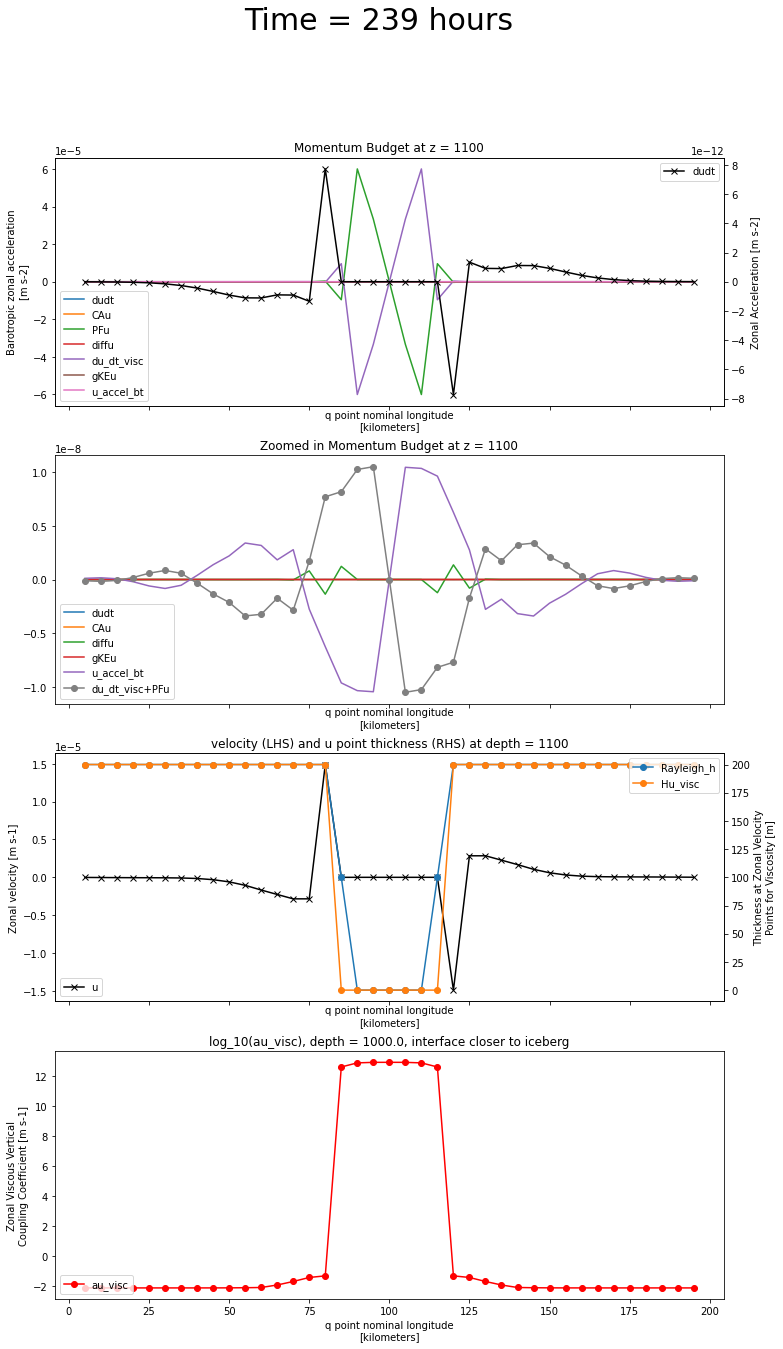

In [61]:
label = 'zstar-isomip-drag-kvbig-symshelf-ray2e-32e-2'

mom = open_mom(label)
prog = open_files(label)
visc = open_visc(label)
time = 10*24-1
depth = 1100
fig, axes = plt.subplots(nrows = 4, sharex = True, figsize = (12,21))
for term in ['dudt','CAu','PFu','diffu','du_dt_visc','gKEu']:
    mom[term].isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = axes[0],label = term)
term = 'u_accel_bt'
mom[term].isel(Time = time, yh = y).plot(ax = axes[0], label = term)
axes[0].legend(loc = 'lower left')
ax2 = axes[0].twinx()
#(mom['du_dt_visc']+mom['PFu']).isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = ax2, label = 'PFu+du_dt_visc', color = 'k')
(mom['dudt']).isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = ax2, label = 'dudt', color = 'k', marker = 'x')
ax2.legend(loc = 'upper right')
axes[0].set_title('Momentum Budget at z = '+str(depth))
ax2.set_title('')

for term in ['dudt','CAu','diffu','gKEu']:
    mom[term].isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = axes[1],label = term)
term = 'u_accel_bt'
mom[term].isel(Time = time, yh = y).plot(ax = axes[1], label = term)
#ax2 = axes[1].twinx()
#(mom['du_dt_visc']+mom['PFu']).isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = ax2, label = 'PFu+du_dt_visc', color = 'k')
(mom['du_dt_visc']+mom['PFu']).isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = axes[1], label = 'du_dt_visc+PFu', color = 'grey', marker = 'o')
#ax2.legend(loc = 'upper right')
axes[1].legend(loc = 'lower left')
axes[1].set_title('Zoomed in Momentum Budget at z = '+str(depth))
#ax2.set_title('')


for term in ['u']:
    prog[term].isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = axes[2], label = term, color = 'k', marker = 'x')
axes[2].legend(loc = 'lower left')
ax2 = axes[2].twinx()
for term in ['Rayleigh_h','Hu_visc']:
    visc[term].isel(Time = time*4, yh = y).sel(zl = depth, method = 'nearest').plot(ax = ax2, label = term, marker = 'o')

ax2.legend(loc = 'upper right')
axes[2].set_title('velocity (LHS) and u point thickness (RHS) at depth = '+str(depth))
ax2.set_title('')

np.log10(visc.au_visc.isel(Time = time*4, yh = y).sel(zi = depth-50, method = 'nearest')).plot(ax = axes[3], label = 'au_visc', color = 'r', marker = 'o')
zs = visc.au_visc.isel(Time = time*4, yh = y).sel(zi = depth-50, method = 'nearest').zi.values
axes[3].legend(loc = 'lower left')
axes[3].set_title('log_10(au_visc), depth = '+str(zs)+', interface closer to iceberg')

fig.suptitle('Time = '+str(time)+' hours', fontsize = 30)

# same for seamount

/Users/claireyung/opt/anaconda3/lib/python3.9/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


Text(0.5, 0.98, 'Time = 239 hours')

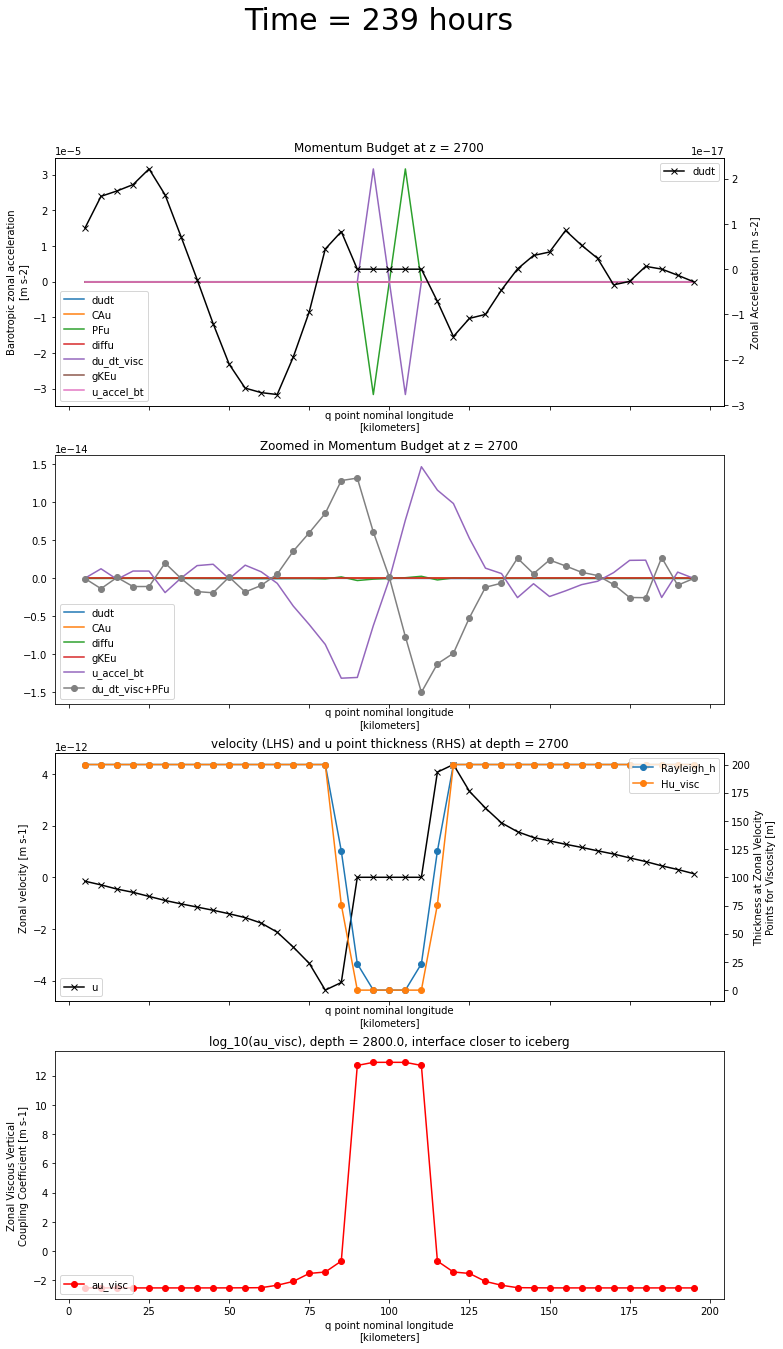

In [56]:
label = 'zstar-isomip-drag-kvbig-symshelf-ray2e-32e-2-topo0'

mom = open_mom(label)
prog = open_files(label)
visc = open_visc(label)
time = 10*24-1
depth = 4000-1300
fig, axes = plt.subplots(nrows = 4, sharex = True, figsize = (12,21))
for term in ['dudt','CAu','PFu','diffu','du_dt_visc','gKEu']:
    mom[term].isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = axes[0],label = term)
term = 'u_accel_bt'
mom[term].isel(Time = time, yh = y).plot(ax = axes[0], label = term)
axes[0].legend(loc = 'lower left')
ax2 = axes[0].twinx()
#(mom['du_dt_visc']+mom['PFu']).isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = ax2, label = 'PFu+du_dt_visc', color = 'k')
(mom['dudt']).isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = ax2, label = 'dudt', color = 'k', marker = 'x')
ax2.legend(loc = 'upper right')
axes[0].set_title('Momentum Budget at z = '+str(depth))
ax2.set_title('')

for term in ['dudt','CAu','diffu','gKEu']:
    mom[term].isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = axes[1],label = term)
term = 'u_accel_bt'
mom[term].isel(Time = time, yh = y).plot(ax = axes[1], label = term)
#ax2 = axes[1].twinx()
#(mom['du_dt_visc']+mom['PFu']).isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = ax2, label = 'PFu+du_dt_visc', color = 'k')
(mom['du_dt_visc']+mom['PFu']).isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = axes[1], label = 'du_dt_visc+PFu', color = 'grey', marker = 'o')
#ax2.legend(loc = 'upper right')
axes[1].legend(loc = 'lower left')
axes[1].set_title('Zoomed in Momentum Budget at z = '+str(depth))
#ax2.set_title('')


for term in ['u']:
    prog[term].isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = axes[2], label = term, color = 'k', marker = 'x')
axes[2].legend(loc = 'lower left')
ax2 = axes[2].twinx()
for term in ['Rayleigh_h','Hu_visc']:
    visc[term].isel(Time = time*4, yh = y).sel(zl = depth, method = 'nearest').plot(ax = ax2, label = term, marker = 'o')

ax2.legend(loc = 'upper right')
axes[2].set_title('velocity (LHS) and u point thickness (RHS) at depth = '+str(depth))
ax2.set_title('')

np.log10(visc.au_visc.isel(Time = time*4, yh = y).sel(zi = depth+50, method = 'nearest')).plot(ax = axes[3], label = 'au_visc', color = 'r', marker = 'o')
zs = visc.au_visc.isel(Time = time*4, yh = y).sel(zi = depth+50, method = 'nearest').zi.values
axes[3].legend(loc = 'lower left')
axes[3].set_title('log_10(au_visc), depth = '+str(zs)+', interface closer to iceberg')

fig.suptitle('Time = '+str(time)+' hours', fontsize = 30)

/Users/claireyung/opt/anaconda3/lib/python3.9/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


Text(0.5, 0.98, 'Time = 239 hours')

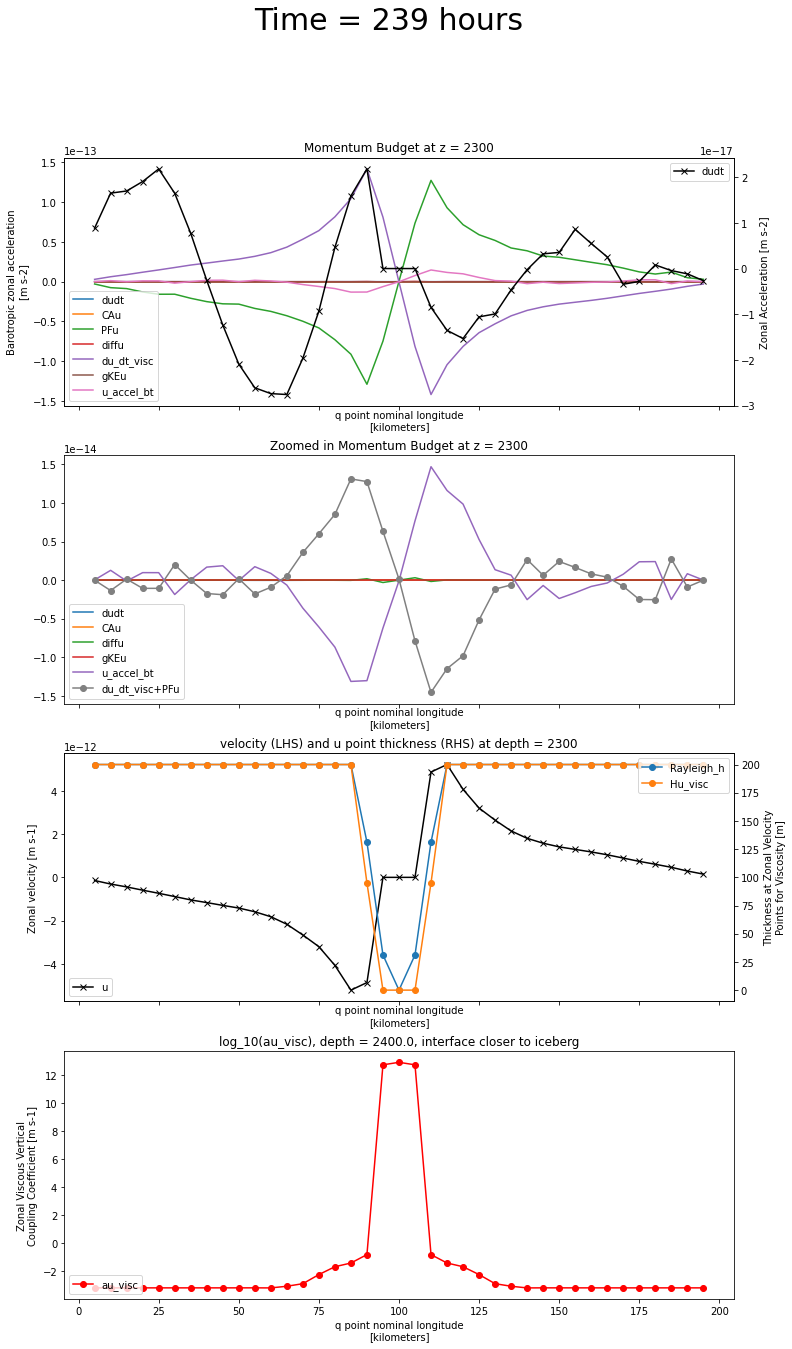

In [63]:
label = 'zstar-isomip-drag-kvbig-symshelf-ray2e-32e-2-topo0'

mom = open_mom(label)
prog = open_files(label)
visc = open_visc(label)
time = 10*24-1
depth = 4000-1700
fig, axes = plt.subplots(nrows = 4, sharex = True, figsize = (12,21))
for term in ['dudt','CAu','PFu','diffu','du_dt_visc','gKEu']:
    mom[term].isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = axes[0],label = term)
term = 'u_accel_bt'
mom[term].isel(Time = time, yh = y).plot(ax = axes[0], label = term)
axes[0].legend(loc = 'lower left')
ax2 = axes[0].twinx()
#(mom['du_dt_visc']+mom['PFu']).isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = ax2, label = 'PFu+du_dt_visc', color = 'k')
(mom['dudt']).isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = ax2, label = 'dudt', color = 'k', marker = 'x')
ax2.legend(loc = 'upper right')
axes[0].set_title('Momentum Budget at z = '+str(depth))
ax2.set_title('')

for term in ['dudt','CAu','diffu','gKEu']:
    mom[term].isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = axes[1],label = term)
term = 'u_accel_bt'
mom[term].isel(Time = time, yh = y).plot(ax = axes[1], label = term)
#ax2 = axes[1].twinx()
#(mom['du_dt_visc']+mom['PFu']).isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = ax2, label = 'PFu+du_dt_visc', color = 'k')
(mom['du_dt_visc']+mom['PFu']).isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = axes[1], label = 'du_dt_visc+PFu', color = 'grey', marker = 'o')
#ax2.legend(loc = 'upper right')
axes[1].legend(loc = 'lower left')
axes[1].set_title('Zoomed in Momentum Budget at z = '+str(depth))
#ax2.set_title('')


for term in ['u']:
    prog[term].isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = axes[2], label = term, color = 'k', marker = 'x')
axes[2].legend(loc = 'lower left')
ax2 = axes[2].twinx()
for term in ['Rayleigh_h','Hu_visc']:
    visc[term].isel(Time = time*4, yh = y).sel(zl = depth, method = 'nearest').plot(ax = ax2, label = term, marker = 'o')

ax2.legend(loc = 'upper right')
axes[2].set_title('velocity (LHS) and u point thickness (RHS) at depth = '+str(depth))
ax2.set_title('')

np.log10(visc.au_visc.isel(Time = time*4, yh = y).sel(zi = depth+50, method = 'nearest')).plot(ax = axes[3], label = 'au_visc', color = 'r', marker = 'o')
zs = visc.au_visc.isel(Time = time*4, yh = y).sel(zi = depth+50, method = 'nearest').zi.values
axes[3].legend(loc = 'lower left')
axes[3].set_title('log_10(au_visc), depth = '+str(zs)+', interface closer to iceberg')

fig.suptitle('Time = '+str(time)+' hours', fontsize = 30)

# Try without hack mode

/Users/claireyung/opt/anaconda3/lib/python3.9/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


Text(0.5, 0.98, 'Time = 239 hours')

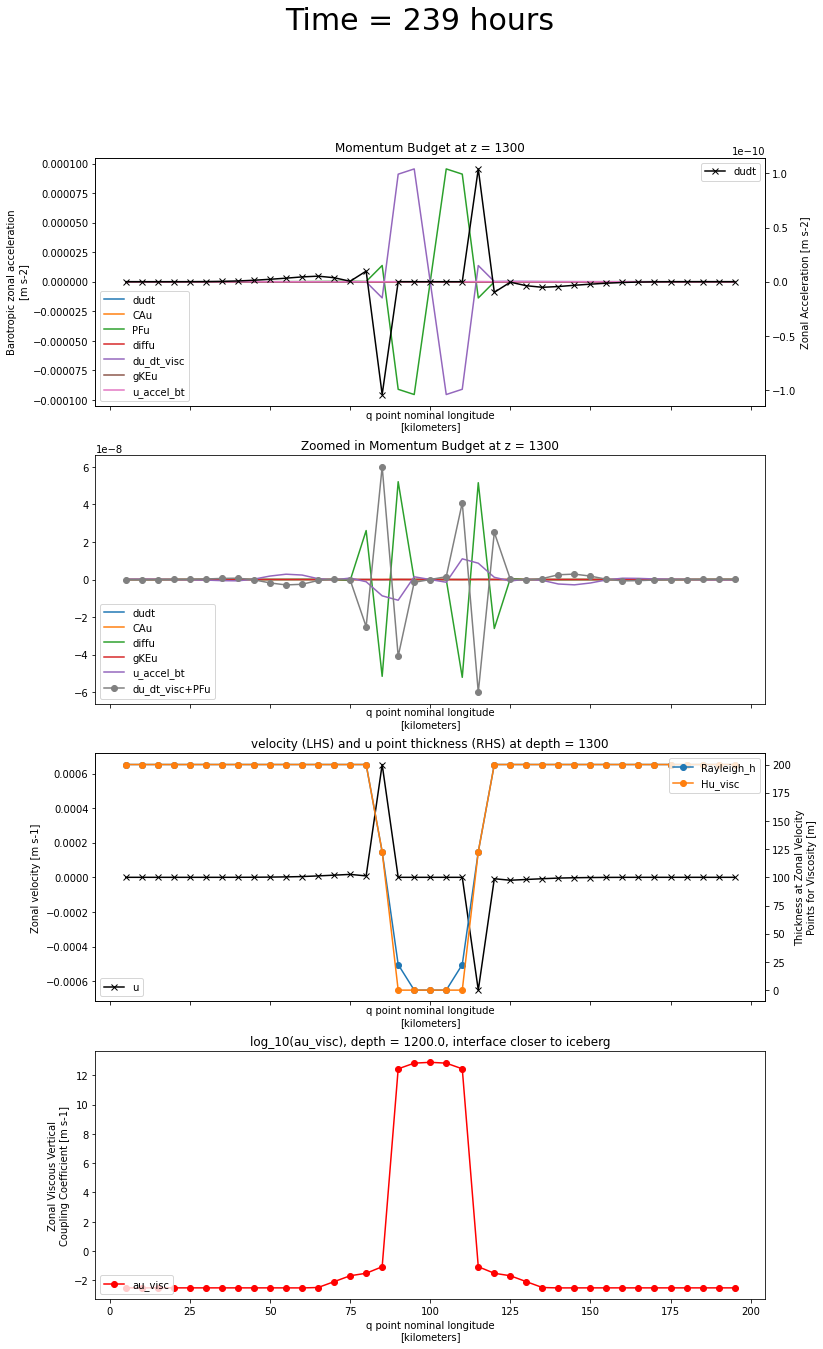

In [65]:
label = 'zstar-isomip-drag-kvbig-symshelf-ray2e-32e-2-nohack'

mom = open_mom(label)
prog = open_files(label)
visc = open_visc(label)
time = 10*24-1
depth = 1300
fig, axes = plt.subplots(nrows = 4, sharex = True, figsize = (12,21))
for term in ['dudt','CAu','PFu','diffu','du_dt_visc','gKEu']:
    mom[term].isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = axes[0],label = term)
term = 'u_accel_bt'
mom[term].isel(Time = time, yh = y).plot(ax = axes[0], label = term)
axes[0].legend(loc = 'lower left')
ax2 = axes[0].twinx()
#(mom['du_dt_visc']+mom['PFu']).isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = ax2, label = 'PFu+du_dt_visc', color = 'k')
(mom['dudt']).isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = ax2, label = 'dudt', color = 'k', marker = 'x')
ax2.legend(loc = 'upper right')
axes[0].set_title('Momentum Budget at z = '+str(depth))
ax2.set_title('')

for term in ['dudt','CAu','diffu','gKEu']:
    mom[term].isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = axes[1],label = term)
term = 'u_accel_bt'
mom[term].isel(Time = time, yh = y).plot(ax = axes[1], label = term)
#ax2 = axes[1].twinx()
#(mom['du_dt_visc']+mom['PFu']).isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = ax2, label = 'PFu+du_dt_visc', color = 'k')
(mom['du_dt_visc']+mom['PFu']).isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = axes[1], label = 'du_dt_visc+PFu', color = 'grey', marker = 'o')
#ax2.legend(loc = 'upper right')
axes[1].legend(loc = 'lower left')
axes[1].set_title('Zoomed in Momentum Budget at z = '+str(depth))
#ax2.set_title('')


for term in ['u']:
    prog[term].isel(Time = time, yh = y).sel(zl = depth, method = 'nearest').plot(ax = axes[2], label = term, color = 'k', marker = 'x')
axes[2].legend(loc = 'lower left')
ax2 = axes[2].twinx()
for term in ['Rayleigh_h','Hu_visc']:
    visc[term].isel(Time = time*4, yh = y).sel(zl = depth, method = 'nearest').plot(ax = ax2, label = term, marker = 'o')

ax2.legend(loc = 'upper right')
axes[2].set_title('velocity (LHS) and u point thickness (RHS) at depth = '+str(depth))
ax2.set_title('')

np.log10(visc.au_visc.isel(Time = time*4, yh = y).sel(zi = depth-50, method = 'nearest')).plot(ax = axes[3], label = 'au_visc', color = 'r', marker = 'o')
zs = visc.au_visc.isel(Time = time*4, yh = y).sel(zi = depth-50, method = 'nearest').zi.values
axes[3].legend(loc = 'lower left')
axes[3].set_title('log_10(au_visc), depth = '+str(zs)+', interface closer to iceberg')

fig.suptitle('Time = '+str(time)+' hours', fontsize = 30)

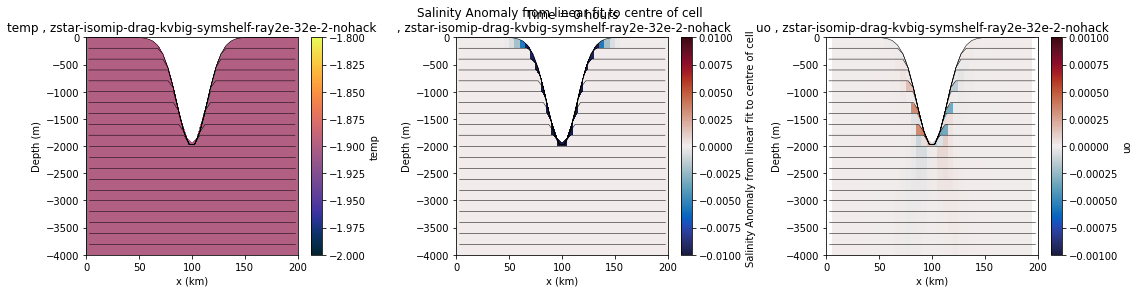

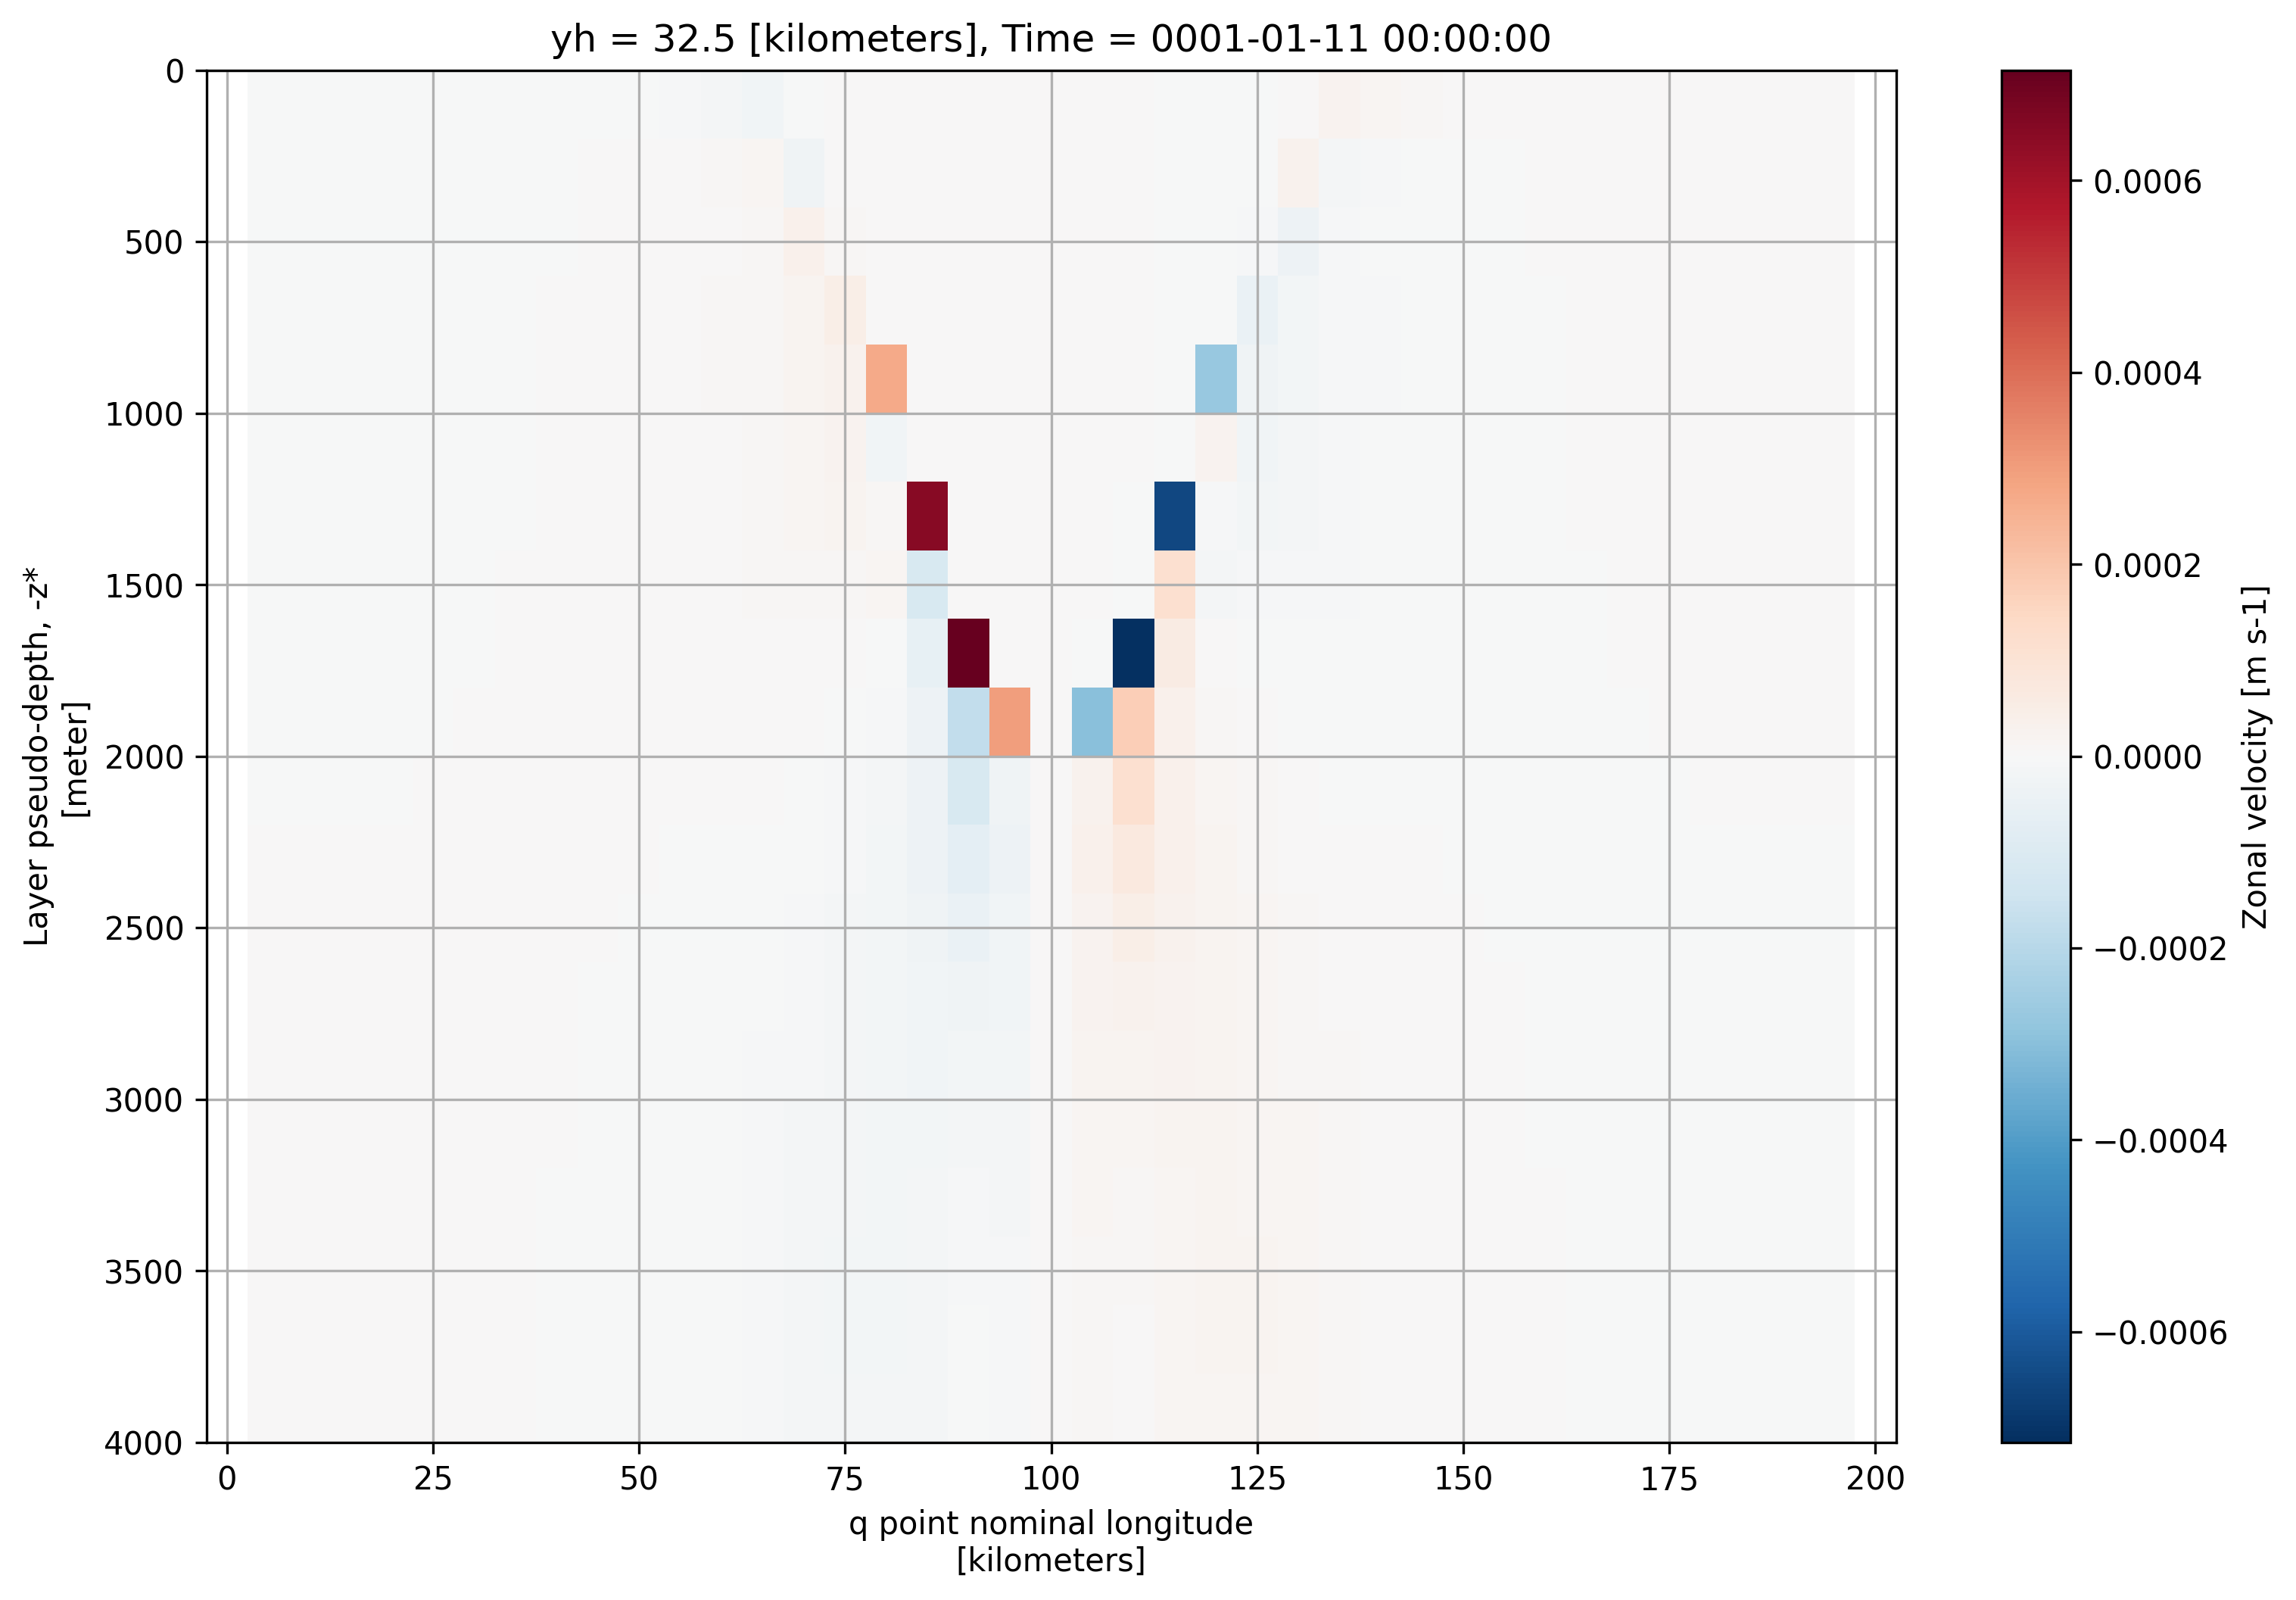

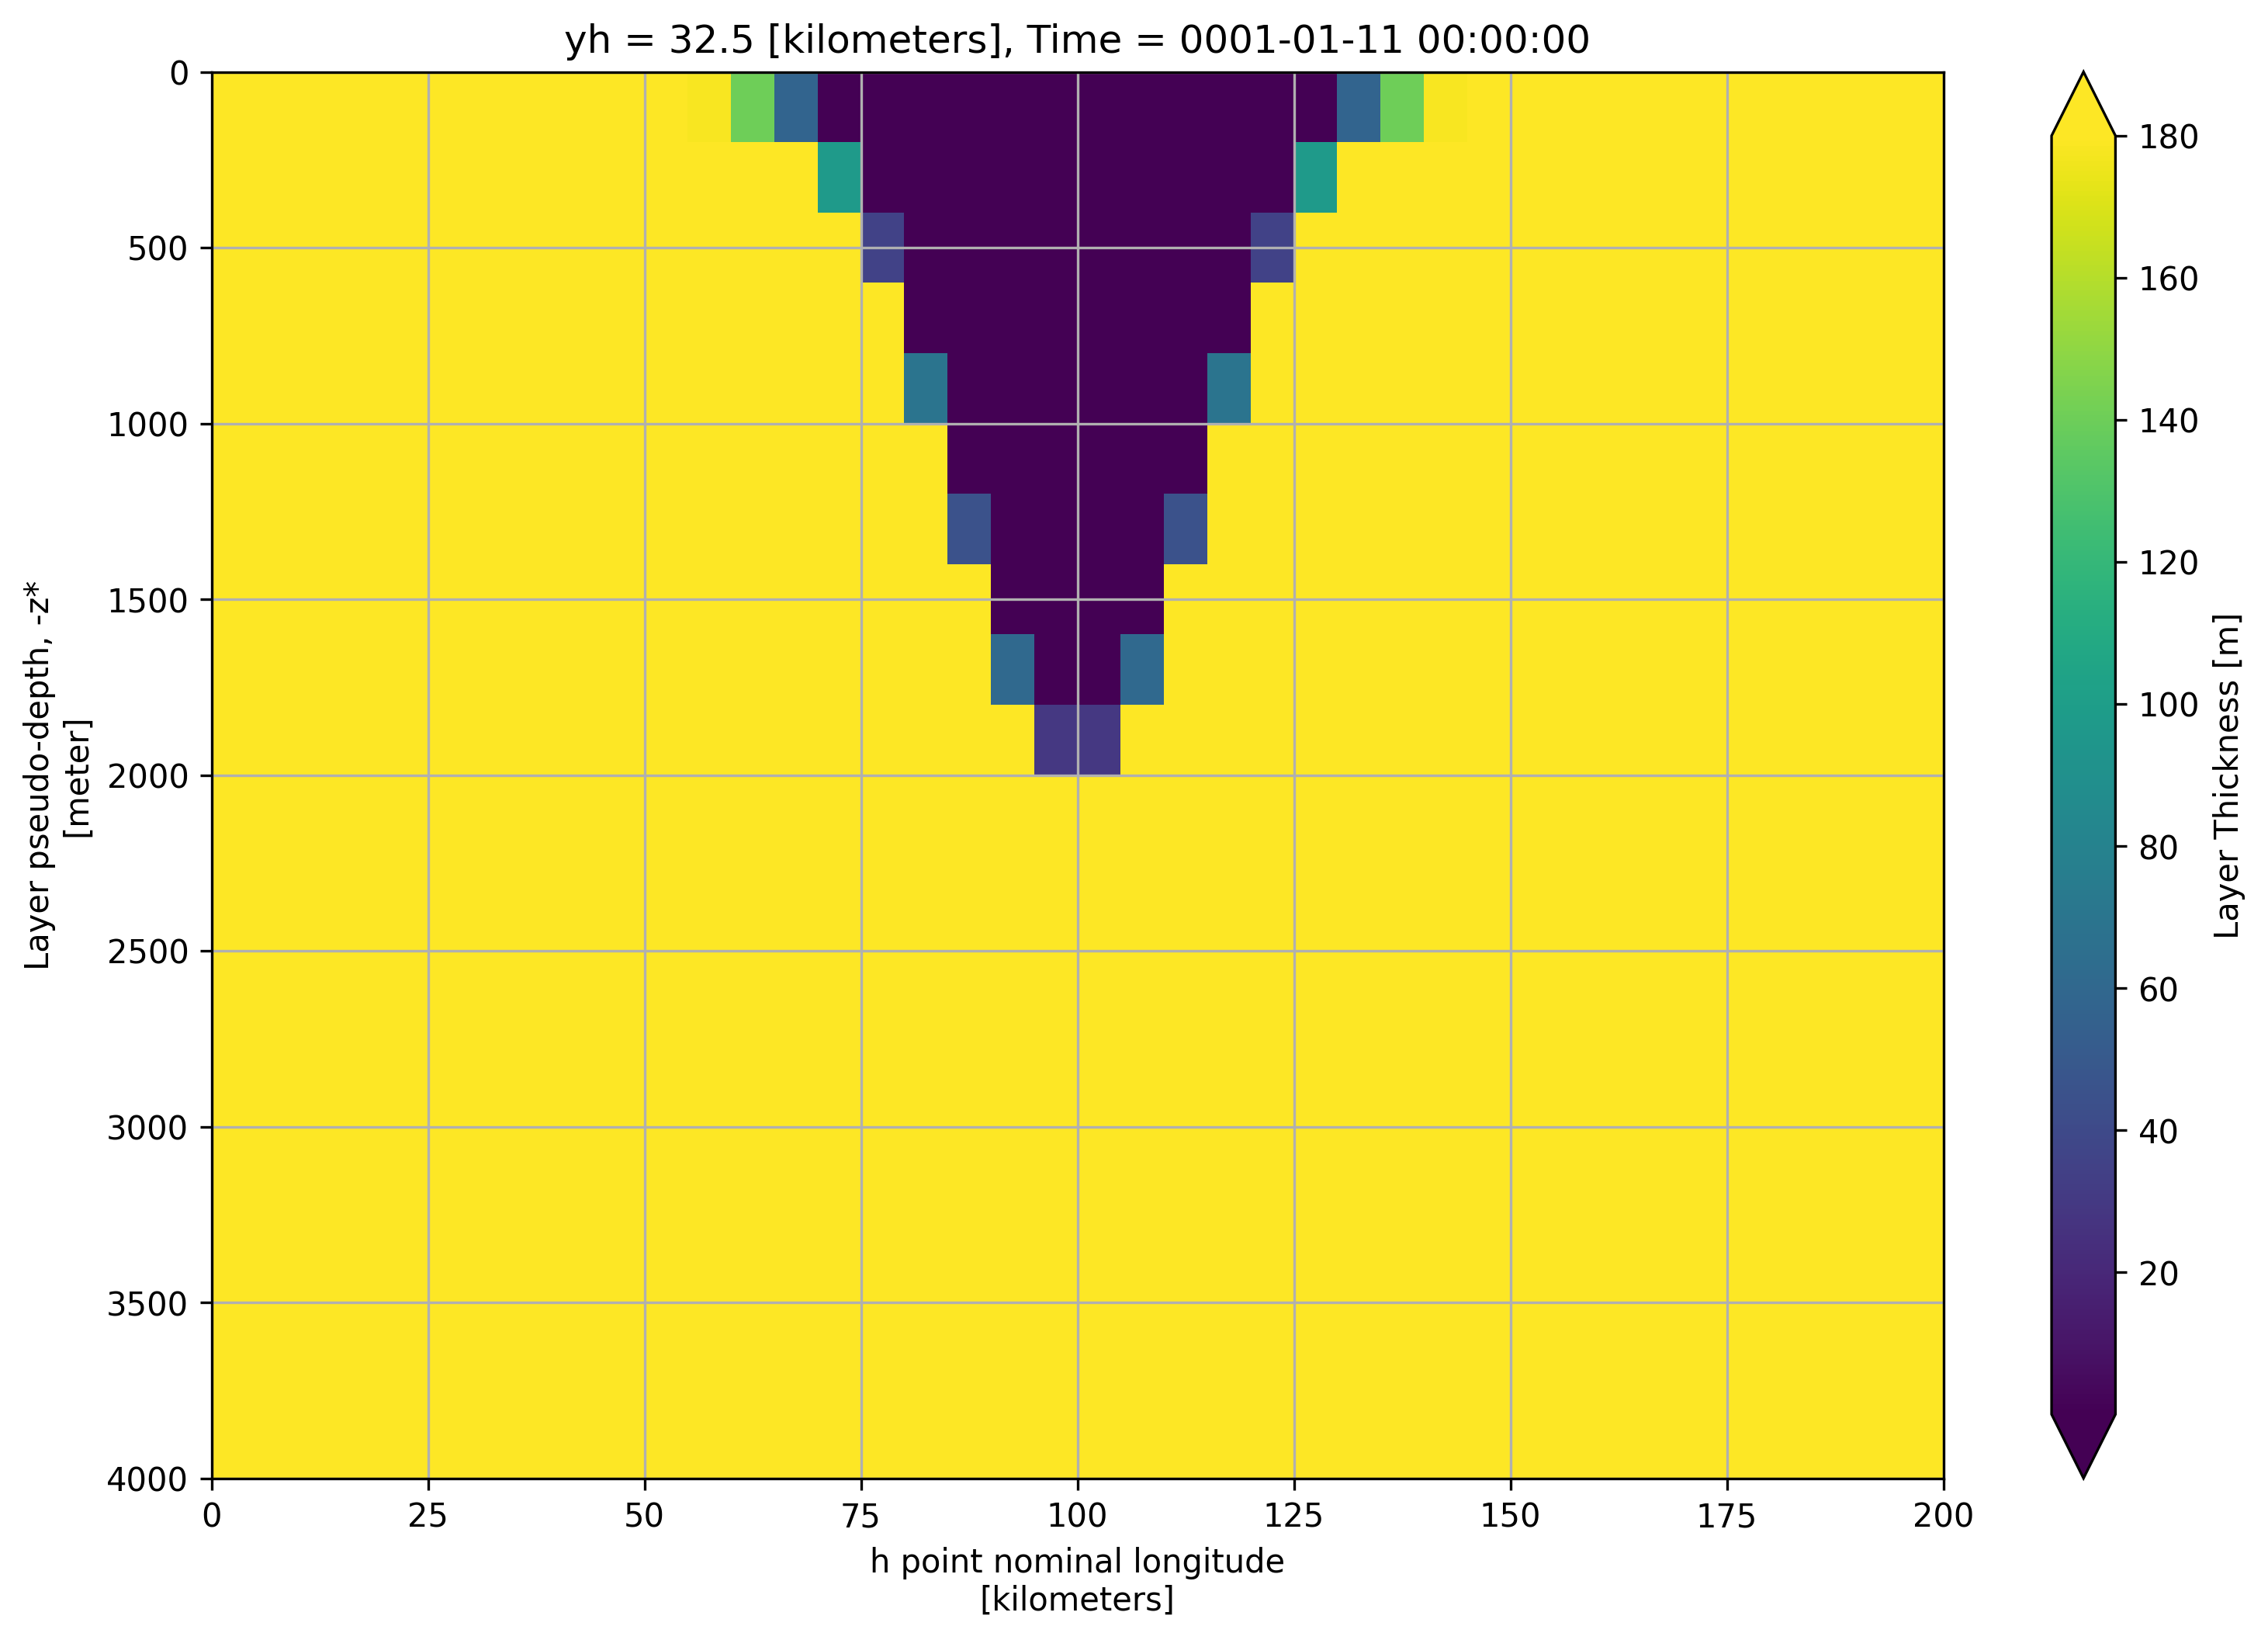

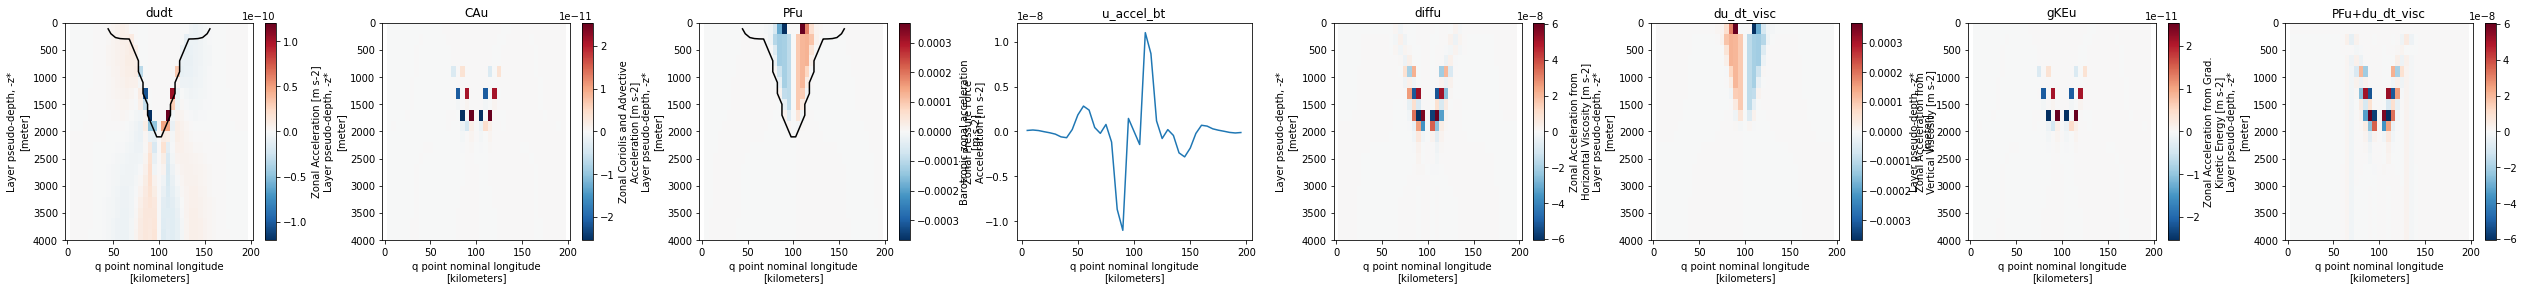

/Users/claireyung/opt/anaconda3/lib/python3.9/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


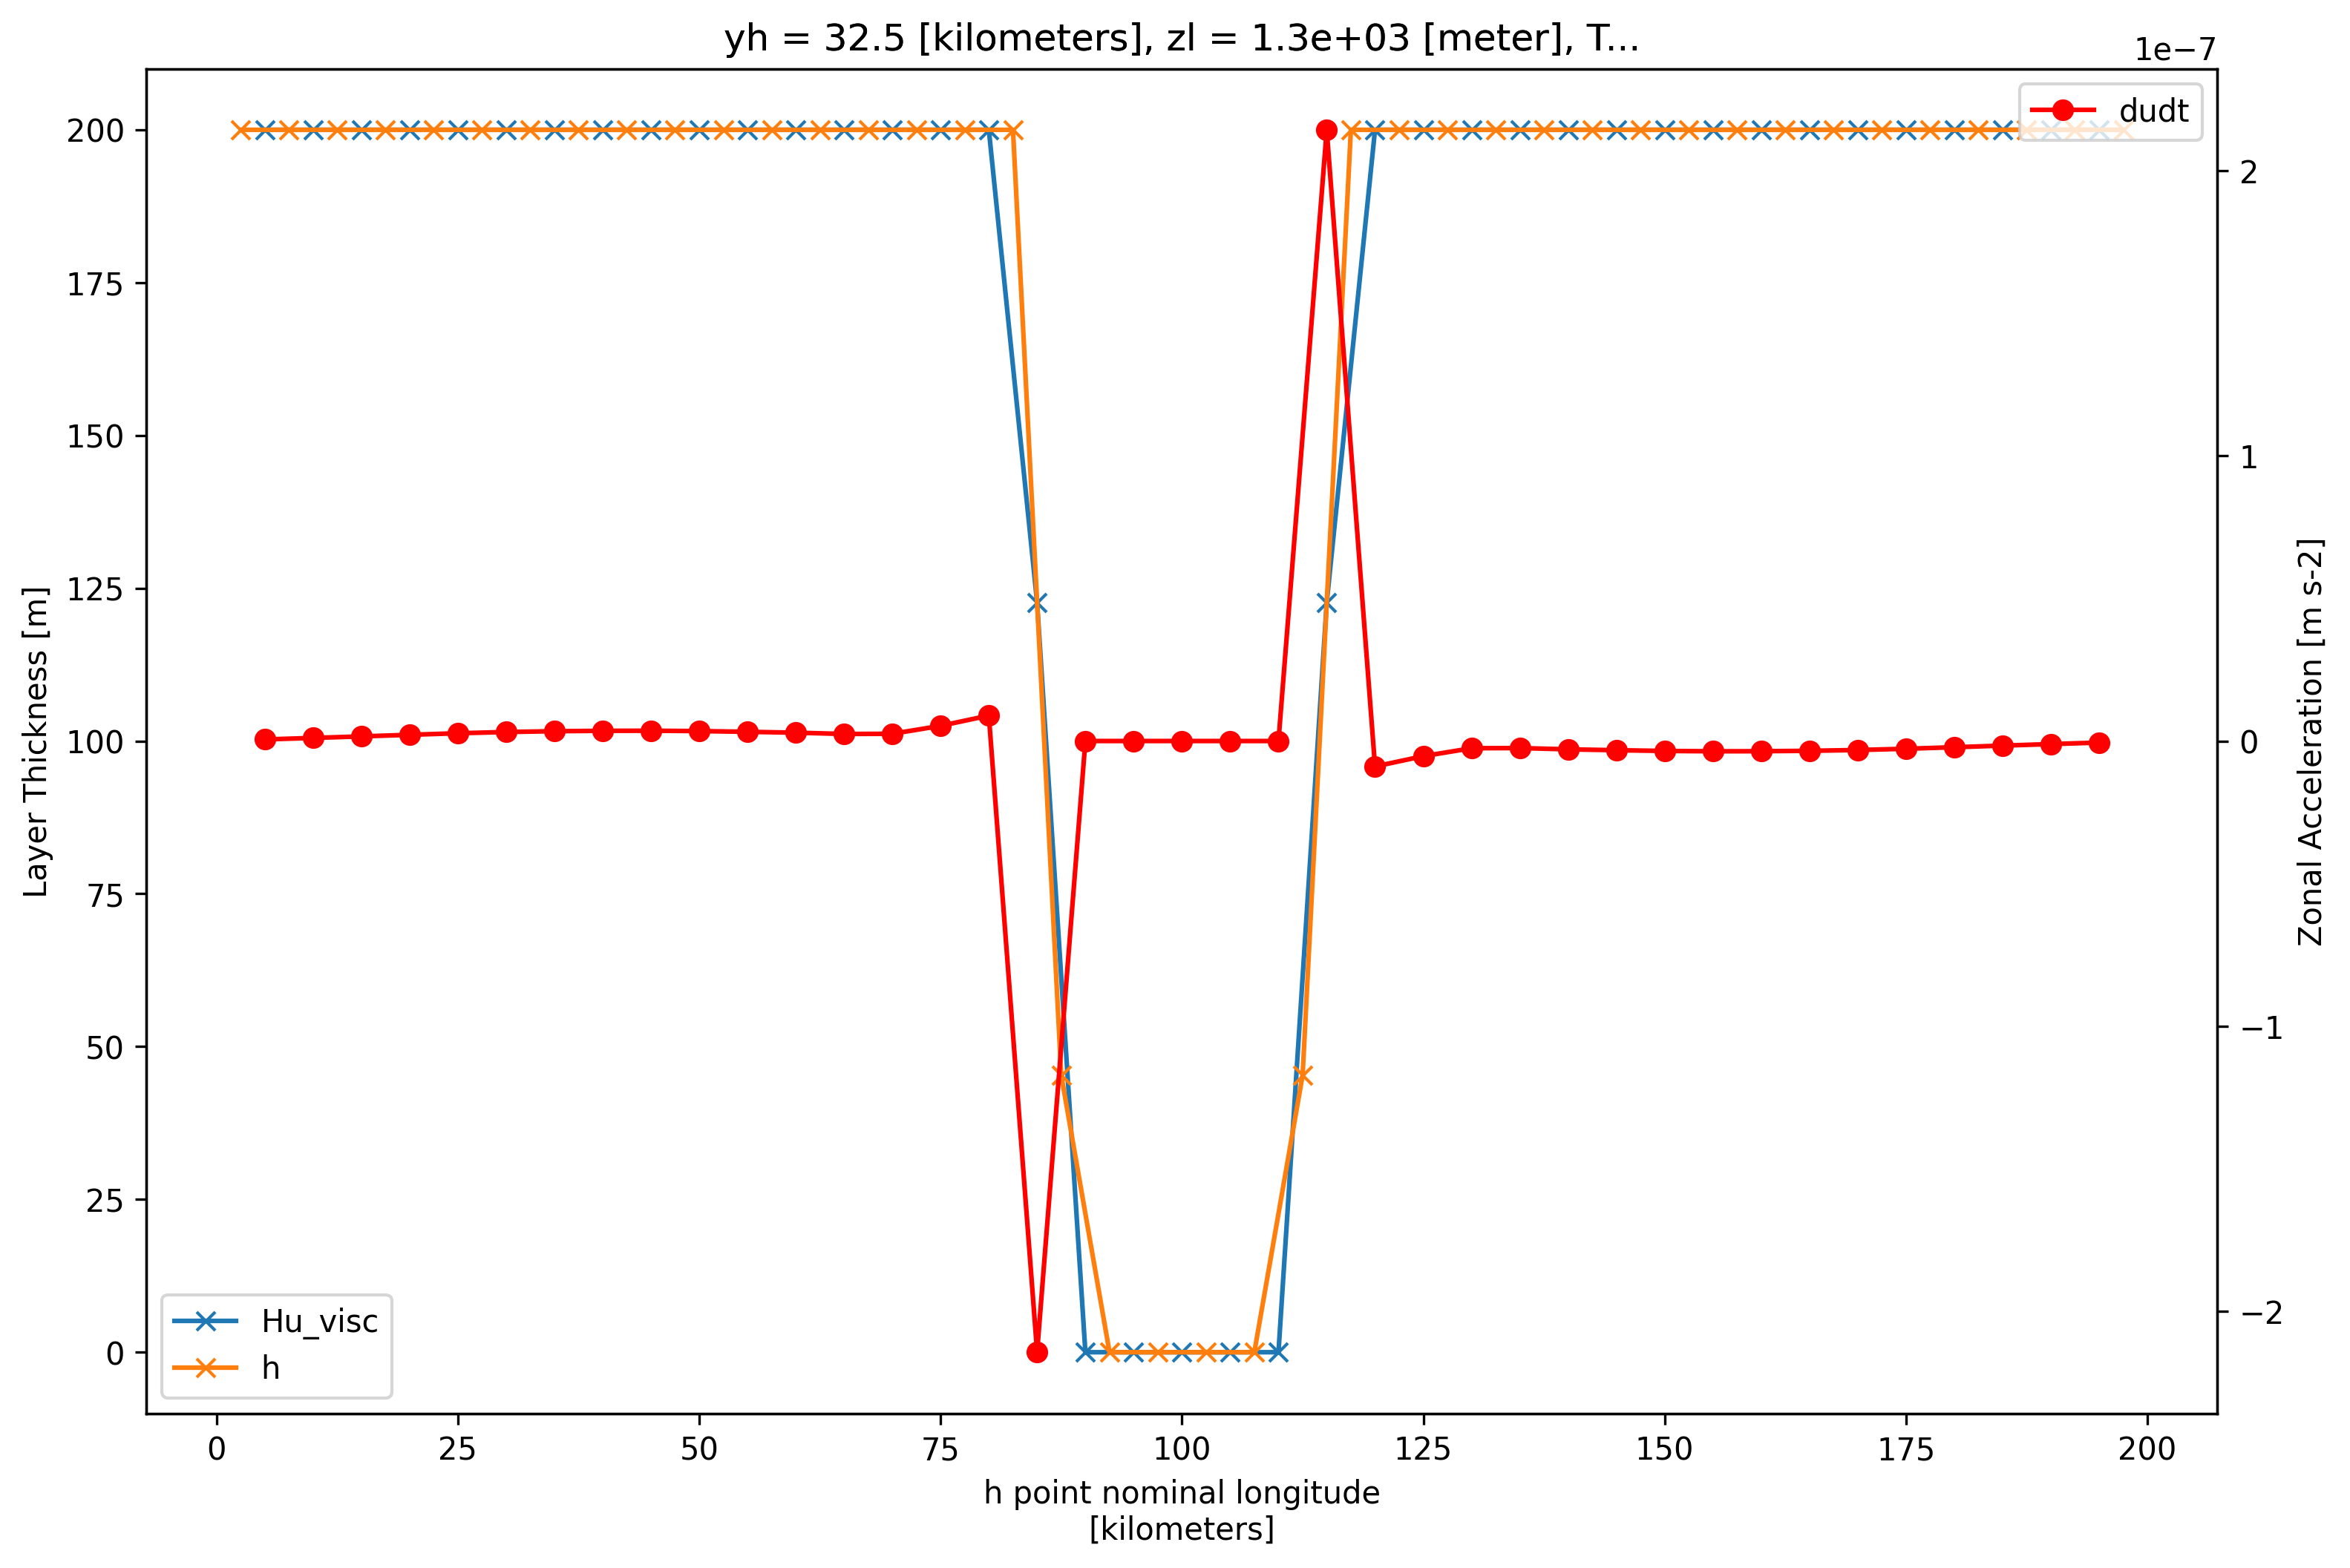

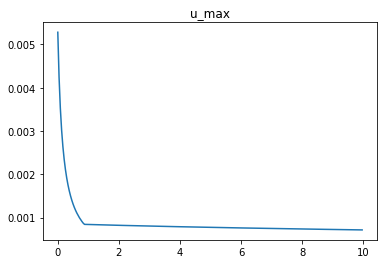

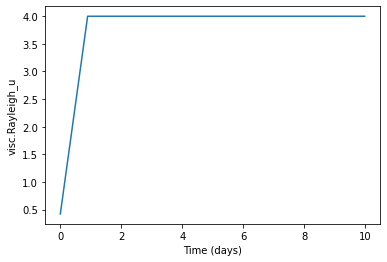

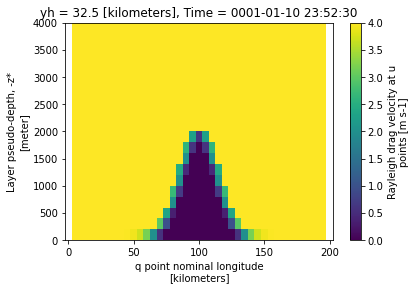

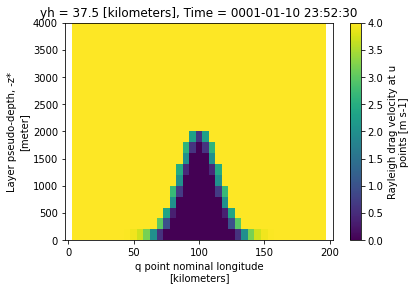

In [69]:


label = 'zstar-isomip-drag-kvbig-symshelf-ray2e-32e-2-nohack'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_files(label)
IC = open_IC(label)
x = 0
time = -1#24*5-1
ymax = 4000
plot(axes[0],x,time,0,prog.temp,"temp",-2,-1.8,cm.cm.thermal,ymax)

prog = open_files(label)
IC = open_IC(label)

#plot(axes[1],x,time,0,prog.salt,"salt",33.7,34.6,cm.cm.haline,ymax)
ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-4000) + 33.8
plot(axes[1],x,time,0,IC.Salt-ideal_salt,"Salinity Anomaly from linear fit to centre of cell \n",-1e-2,1e-2,cm.cm.balance,ymax)


prog = open_files(label)
IC = open_IC(label)

plot(axes[2],x,time,0,prog.u,"uo",-1e-3,1e-3,cm.cm.balance,ymax)

fig.subplots_adjust(wspace = 0.4)
fig.suptitle('Time = '+str(time+1)+' hours')
plt.show()

mom = open_mom(label)
prog = open_files(label)
time = -1
y = 0

fig, ax = plt.subplots(figsize = (12,8), dpi = 300)
prog.u.isel(Time = time, yh = y).plot(yincrease = False)
plt.grid()
plt.show()
fig, ax = plt.subplots(figsize = (12,8), dpi = 300)
prog.h.isel(Time = time, yh = y).plot(vmin = 1e-5, vmax = 180, yincrease = False)
plt.grid()
plt.show()

fig, axes = plt.subplots(ncols = 8, figsize= (44,4))
prog.h.isel(Time = time, yh = y).plot.contour(ax = axes[0], yincrease = False, levels = [199], colors = 'k')
prog.h.isel(Time = time, yh = y).plot.contour(ax = axes[2], yincrease = False, levels = [199], colors = 'k')
mom.dudt.isel(Time = time, yh = y).plot(ax = axes[0], yincrease = False)#, vmin = -1e-12, vmax = 1e-12, cmap = 'RdBu_r')
axes[0].set_title('dudt')

mom.CAu.isel(Time = time, yh = y).plot(ax = axes[1], yincrease = False)#, cmap = 'RdBu_r', vmin = -1e-12, vmax = 1e-12)
axes[1].set_title('CAu')
mom.PFu.isel(Time = time, yh = y).plot(ax = axes[2], yincrease = False)#, cmap = 'RdBu_r', vmin = -1e-12, vmax = 1e-12)
axes[2].set_title('PFu')
mom.u_accel_bt.isel(Time = time, yh = y).plot(ax = axes[3])
axes[3].set_title('u_accel_bt')
mom.diffu.isel(Time = time, yh = y).plot(ax = axes[4], yincrease = False)#, cmap = 'RdBu_r', vmin = -1e-12, vmax = 1e-12)
axes[4].set_title('diffu')
mom.du_dt_visc.isel(Time = time, yh = y).plot(ax = axes[5], yincrease = False)#, cmap = 'RdBu_r', vmin = -1e-12, vmax = 1e-12)
axes[5].set_title('du_dt_visc')
mom.gKEu.isel(Time = time, yh = y).plot(ax = axes[6], yincrease = False)#, cmap = 'RdBu_r', vmin = -1e-12, vmax = 1e-12)
axes[6].set_title('gKEu')
(mom.du_dt_visc+mom.PFu-(mom.du_dt_visc+mom.PFu).isel(zl=0)).isel(Time = time, yh = y).plot(ax = axes[7], yincrease = False)#, cmap = 'RdBu_r', vmin = -1e-12, vmax = 1e-12)
axes[7].set_title('PFu+du_dt_visc')


fig.subplots_adjust(wspace = 0.35)
plt.show()

zl = 1200

fig, ax = plt.subplots(figsize = (12,8), dpi = 300)
visc = open_visc(label)
visc.Hu_visc.isel(Time = 0, yh = 0).sel(zl = zl, method = 'nearest').plot(marker = 'x', label = 'Hu_visc')
prog.h.isel(Time = 0, yh = 0).sel(zl = zl, method = 'nearest').plot(marker = 'x', label = 'h')
ax2 = ax.twinx()
mom.dudt.isel(Time = 0, yh = y).sel(zl = zl, method = 'nearest').plot(ax = ax2, color = 'r', marker = 'o', label = 'dudt')#ax = axes[0])#, yincrease = False)#, vmin = -1e-12, vmax = 1e-12, cmap = 'RdBu_r')
#yincrease = False)
ax.legend()
ax2.legend()

plt.show()

# fig, ax = plt.subplots(figsize = (12,8), dpi = 300)
# visc = xr.open_dataset('archive/visc-'+label+'.nc')
# visc.Hu_visc.isel(Time = 0, yh = 0).sel(zl = 2000, method = 'nearest').plot(marker = 'x', label = 'Hu_visc')
# ax2 = ax.twinx()
# mom.dudt.isel(Time = 0, yh = y).sel(zl = 2000, method = 'nearest').plot(ax = ax2, color = 'r', marker = 'o', label = 'dudt')#ax = axes[0])#, yincrease = False)#, vmin = -1e-12, vmax = 1e-12, cmap = 'RdBu_r')
# #yincrease = False)
# ax.legend()
# ax2.legend()
plt.plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
          label = label) 
plt.title('u_max')
plt.show()

plt.plot(np.arange(len(visc.Time))/(24*4), visc.Rayleigh_u.isel(zl = 0, yh = 0, xq = 1).values)
plt.ylabel('visc.Rayleigh_u')
plt.xlabel('Time (days)')
plt.show()
visc.Rayleigh_u.isel(yh = 0,Time = -1).plot()
plt.show()
visc.Rayleigh_u.isel(yh = 1,Time = -1).plot()
plt.show()
